In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import neighbors
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
warnings.filterwarnings('ignore')
%matplotlib inline

In [147]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [148]:
df = pd.read_csv('train (1).csv')

In [149]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [5]:
df.isnull().sum().max()

1453

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(df_missingData.head(20))
df.isnull().sum().max()

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

1453

In [7]:
df_dropped = df.drop(df_missingData[(df_missingData.Percent > .15)].index, axis=1)

In [8]:
df_dropped.isnull().sum().max()

81

In [9]:
#drop null rows
df_dropped = df_dropped.dropna()
df_dropped.isnull().sum().max()

0

In [10]:
# drop id column
df_dropped = df_dropped.drop('Id',axis=1)

In [11]:
df_dropped.shape

(1338, 74)

In [12]:
# identify columns in numeric and text columns
cols = df_dropped.columns
numCols = df_dropped._get_numeric_data().columns
catTxtCols = list(set(cols) - set(numCols))

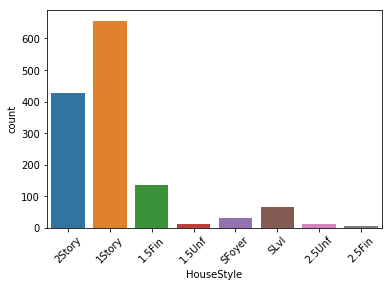

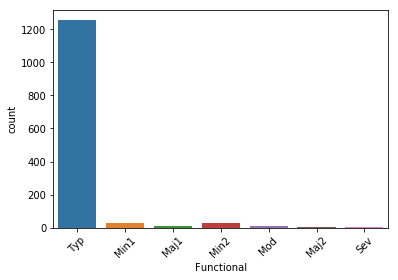

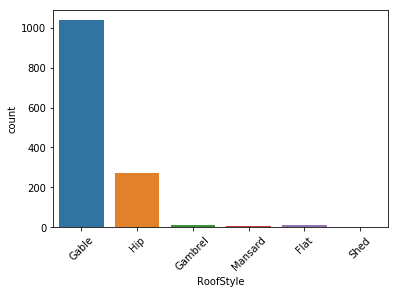

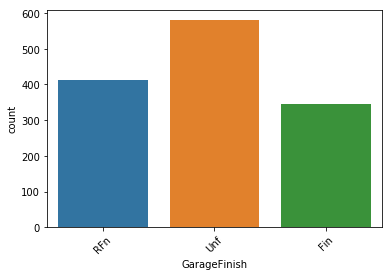

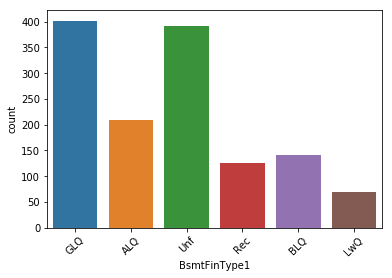

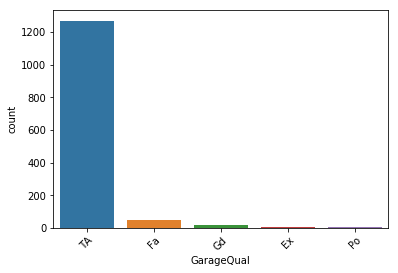

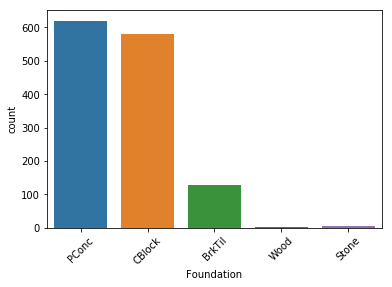

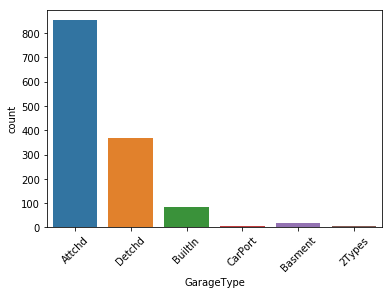

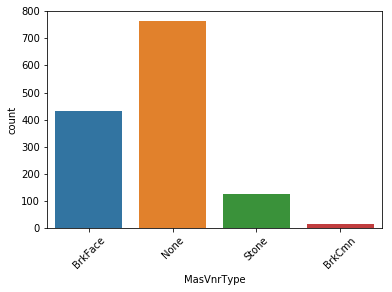

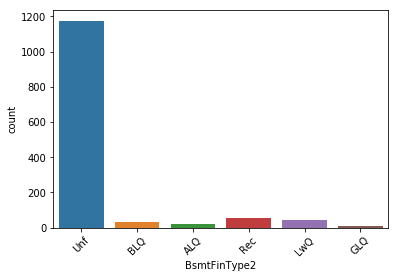

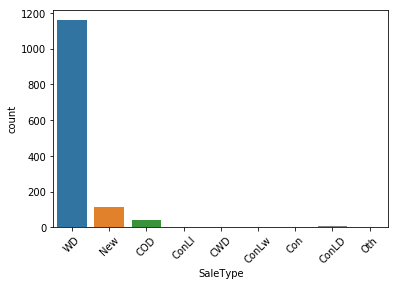

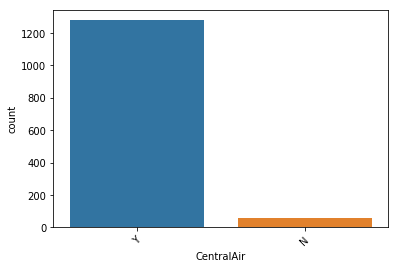

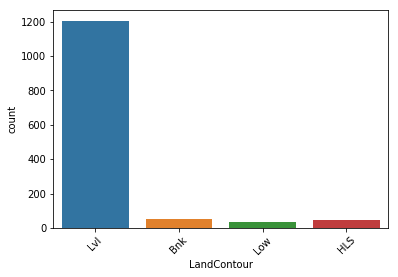

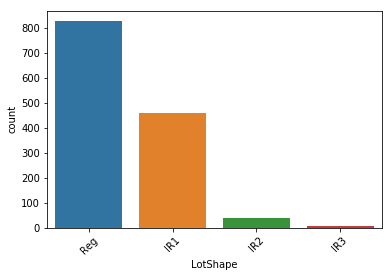

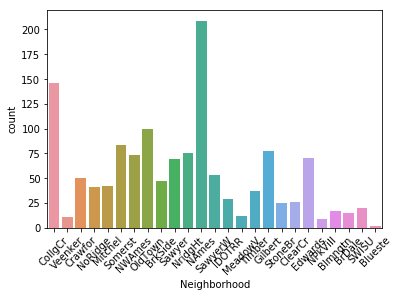

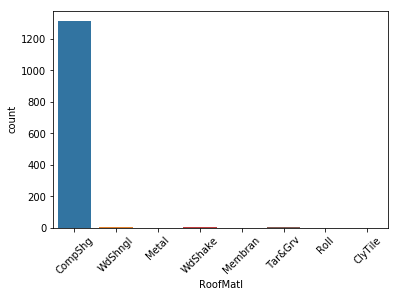

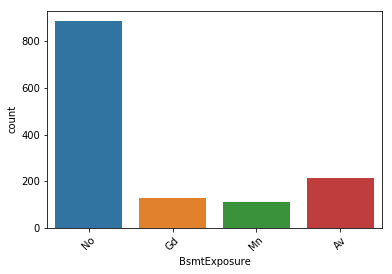

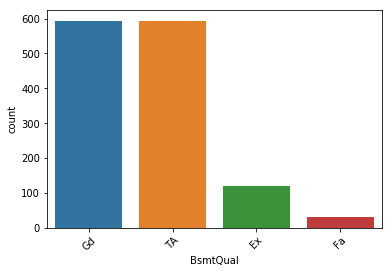

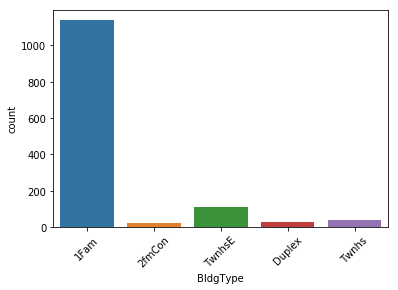

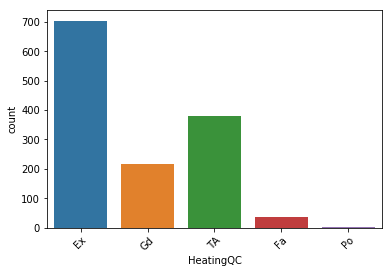

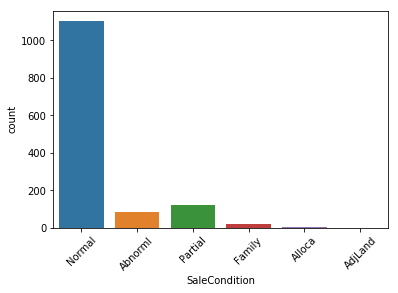

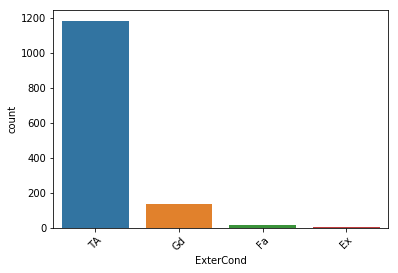

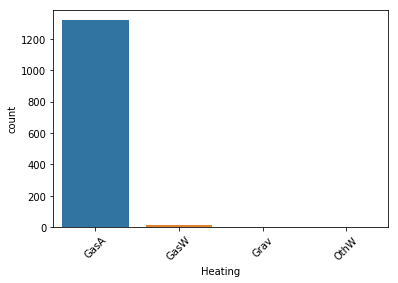

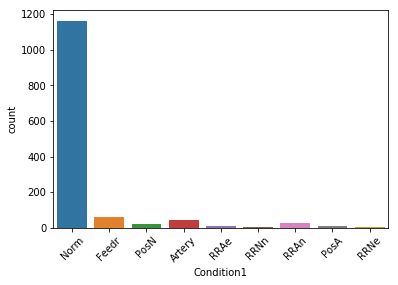

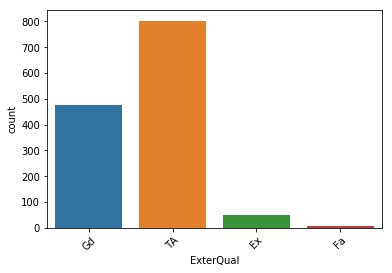

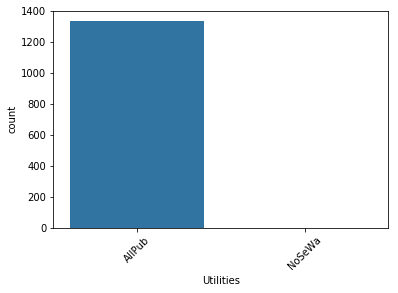

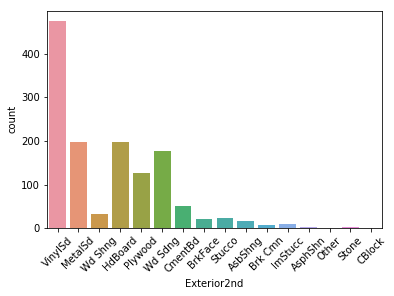

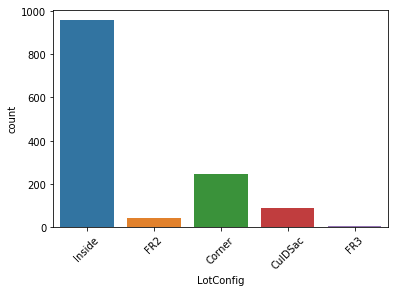

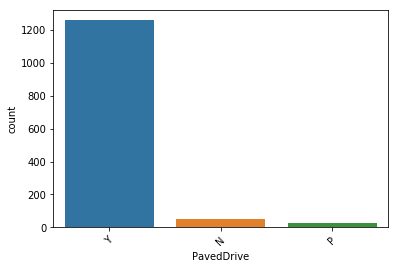

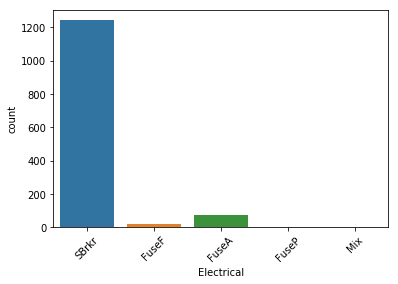

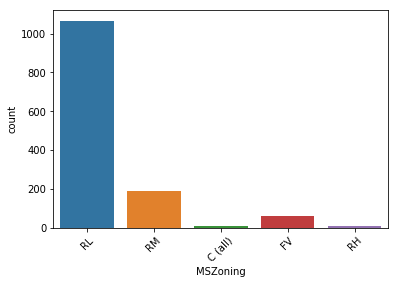

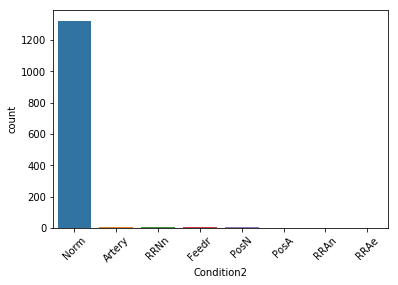

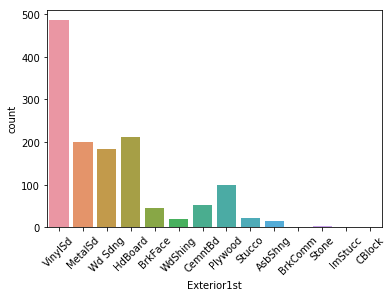

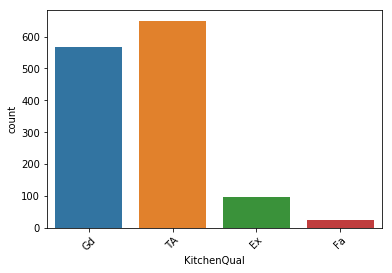

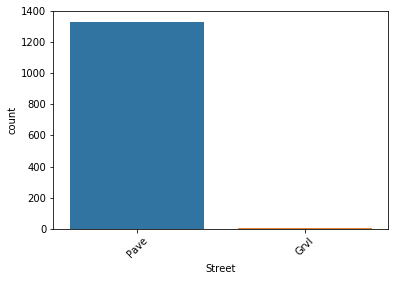

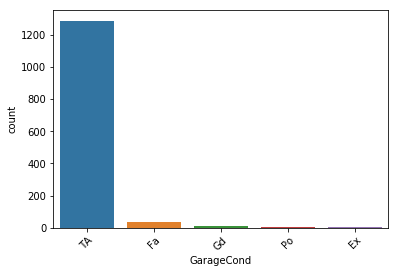

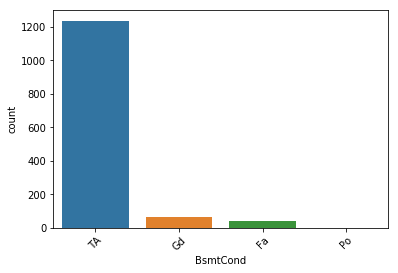

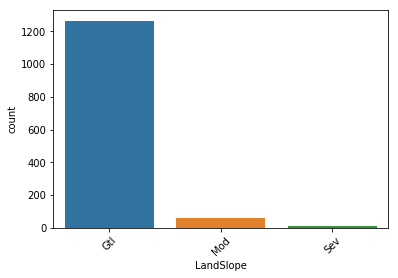

In [13]:
for col in catTxtCols:
    g = sns.countplot(x=col, data=df_dropped)
    plt.setp(g.get_xticklabels(), rotation=45)
    plt.show()

In [14]:
yearCatCols = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

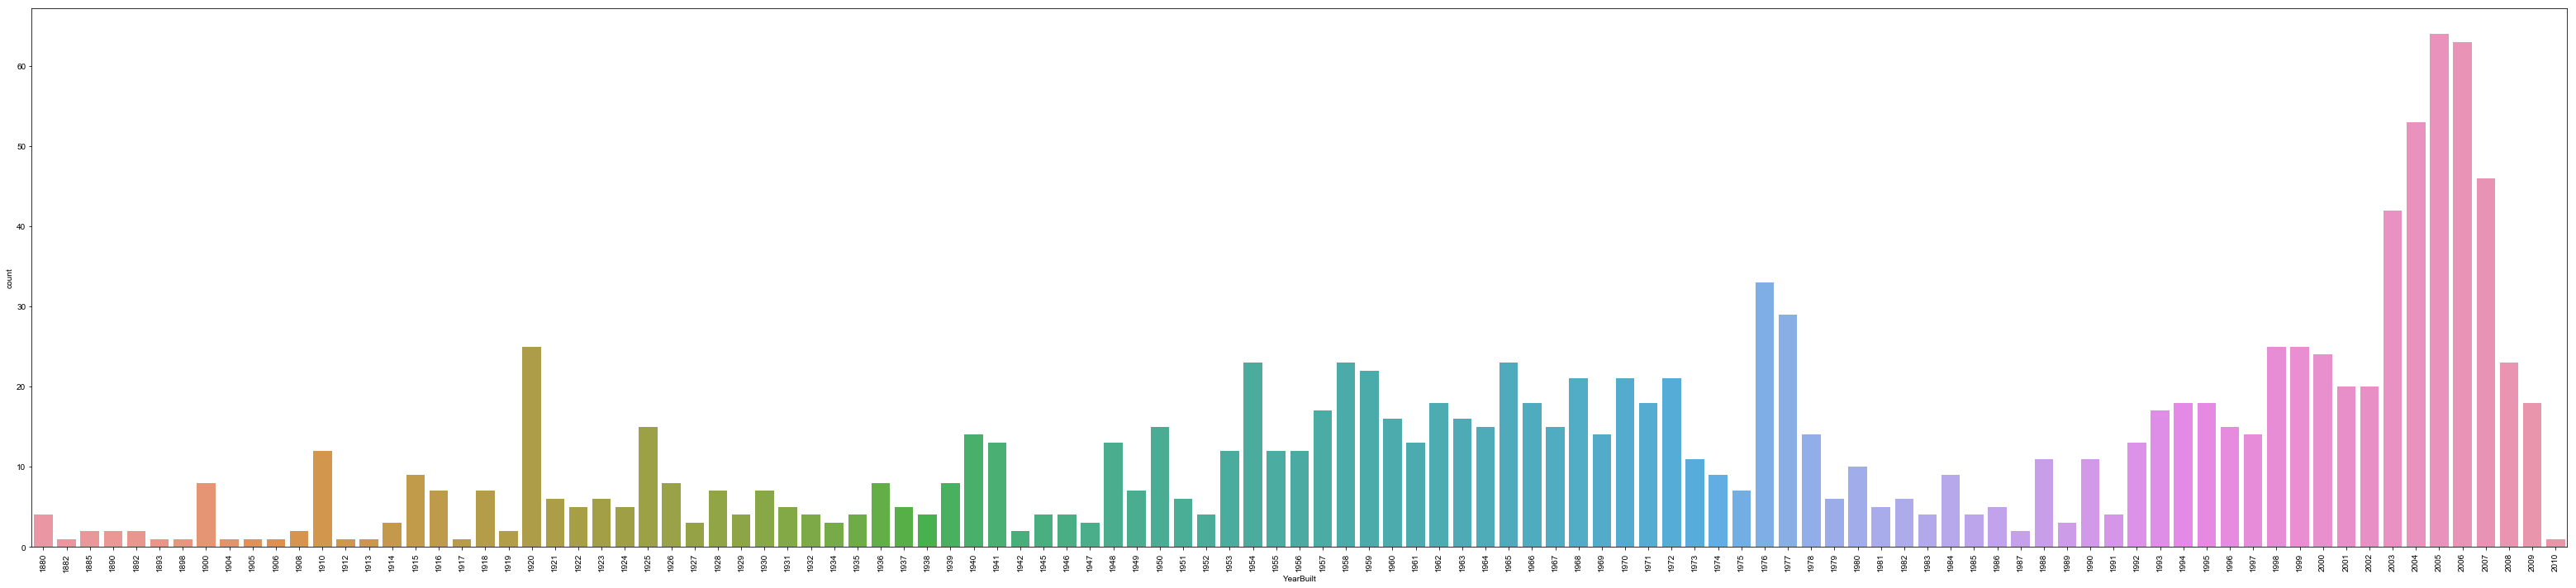

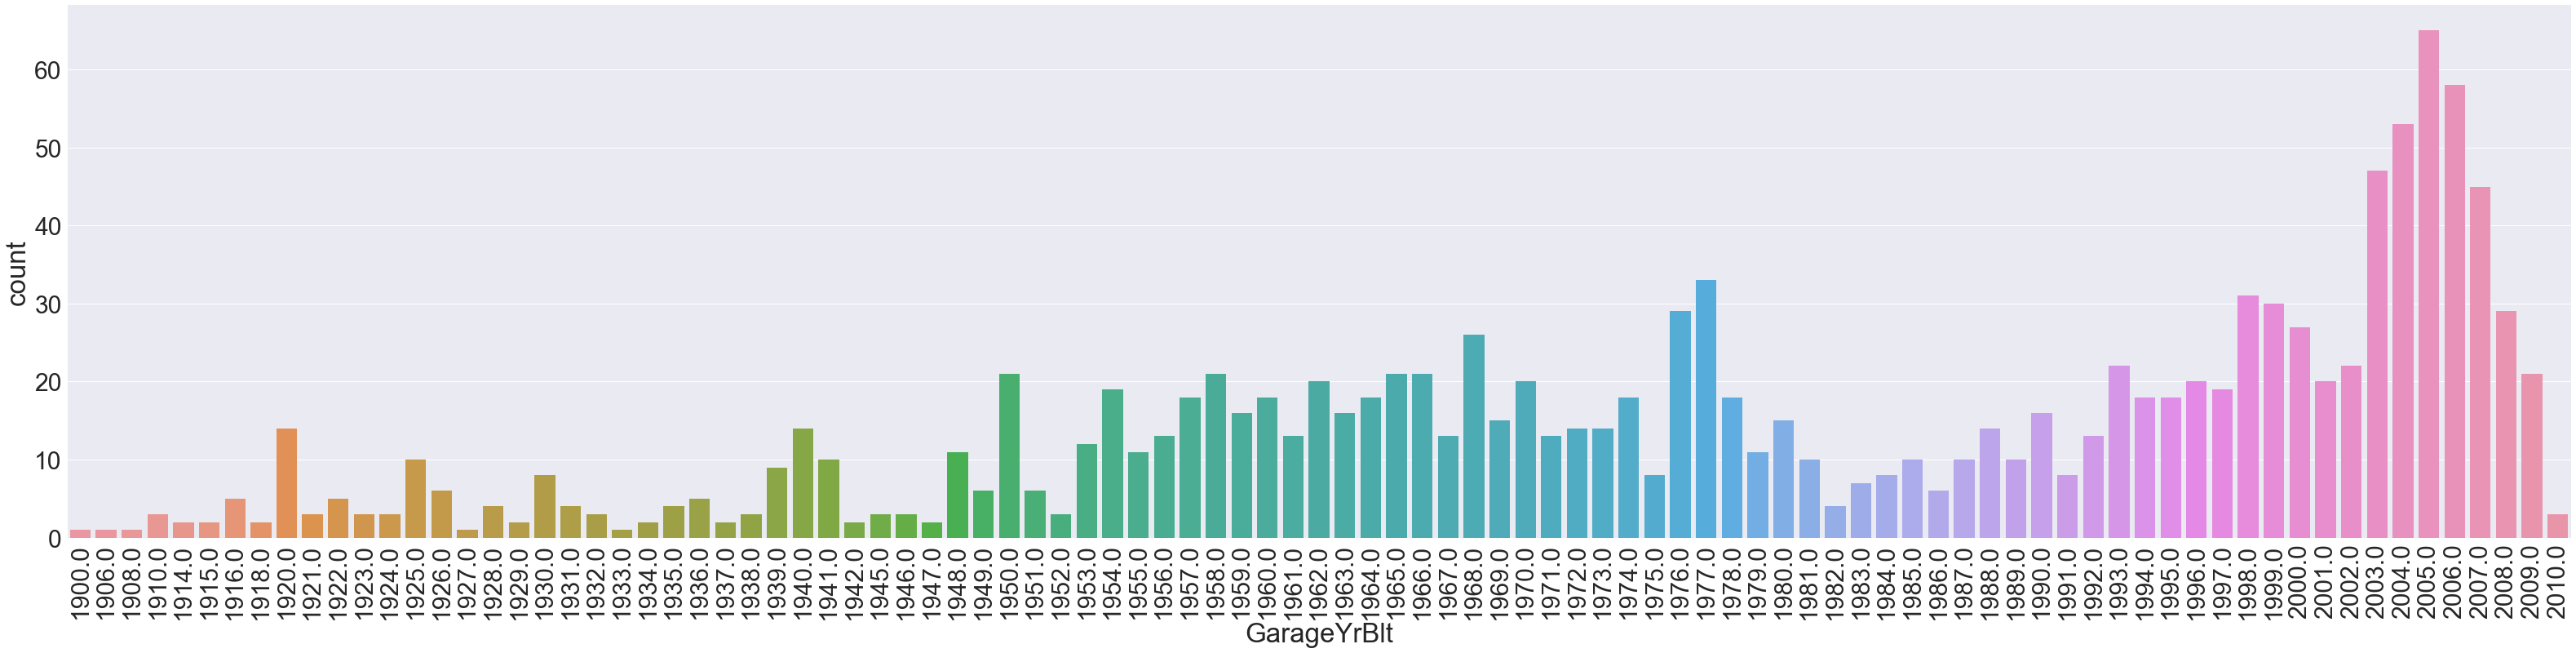

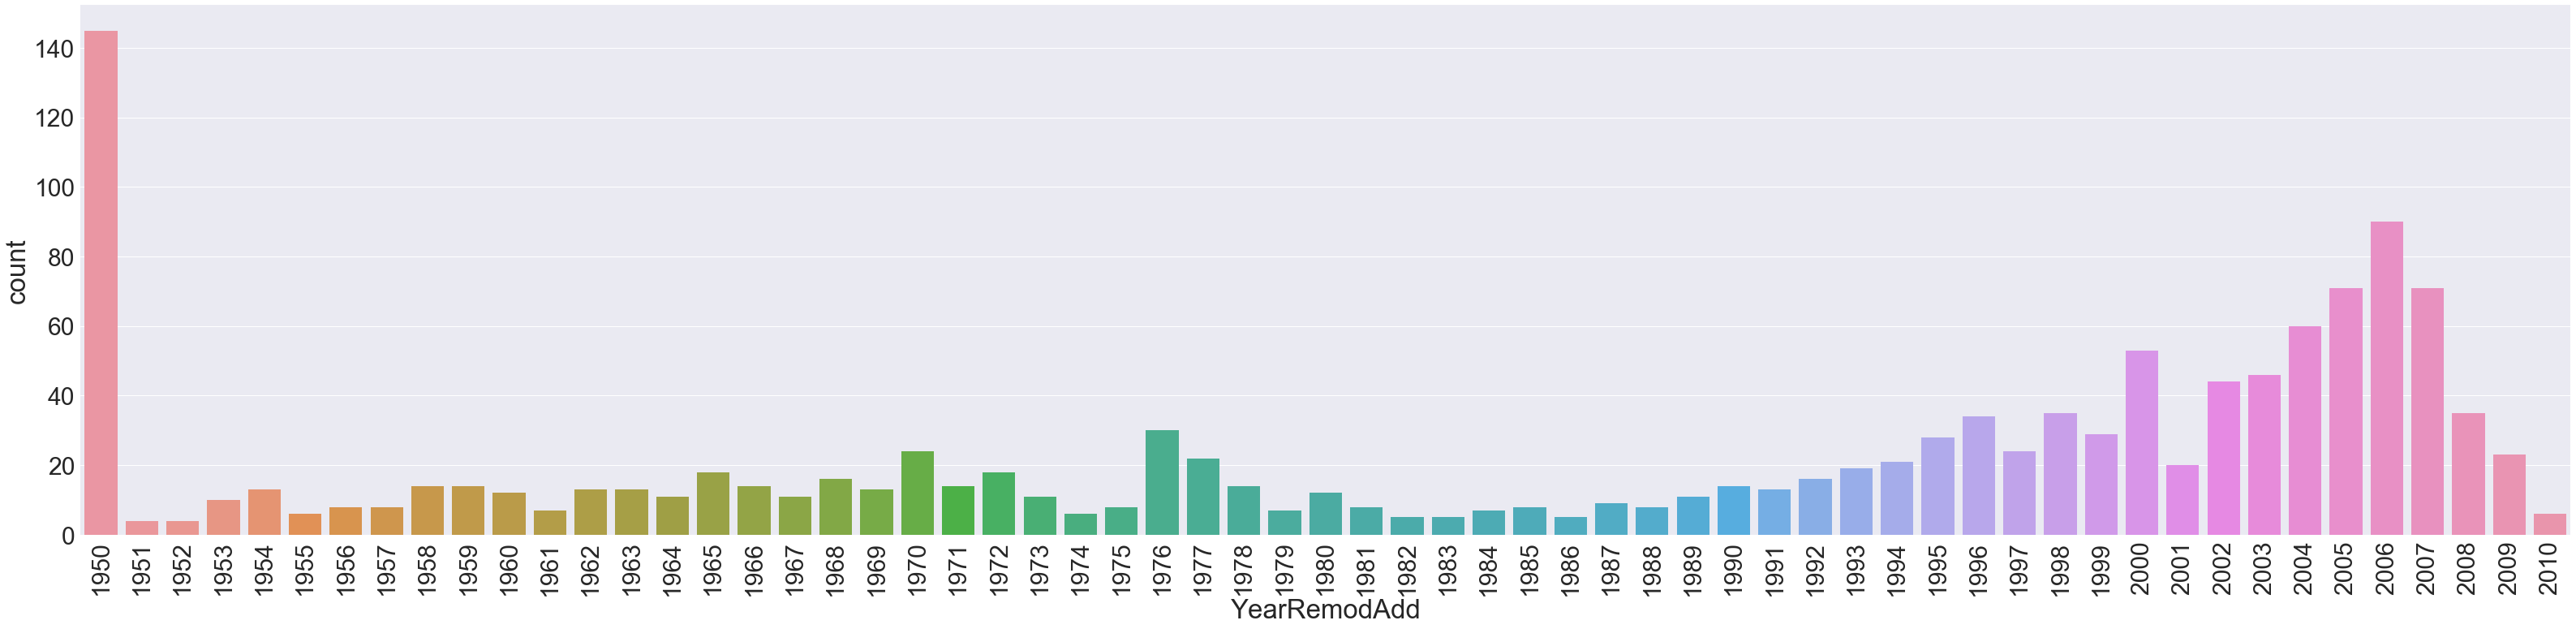

In [15]:
for col in yearCatCols:
    f, ax = plt.subplots(figsize=(55,12))
    sns.set(font_scale = 3)
    fig = sns.countplot(x=col, data=df_dropped)
    x = plt.xticks(rotation=90)

In [16]:
numCatCols = ['Fireplaces',
              'OverallQual',
              'OverallCond',
              'BsmtFullBath',
              'BsmtHalfBath',
              'FullBath',
              'MoSold',
              'GarageCars',
              'KitchenAbvGr',
              'BedroomAbvGr',
              'YrSold',
             'TotRmsAbvGrd',
             'HalfBath',
             'MSSubClass']

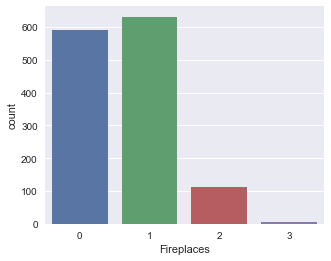

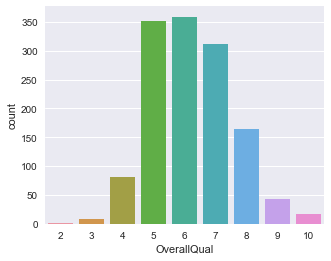

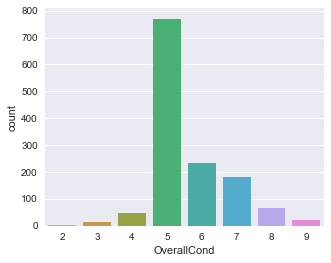

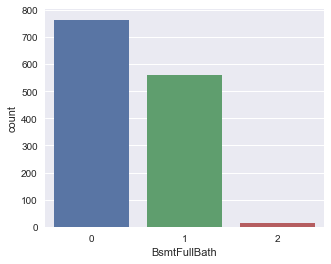

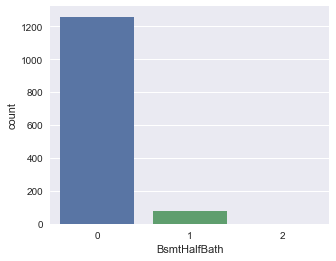

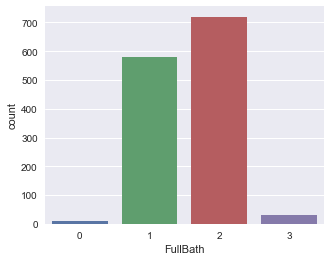

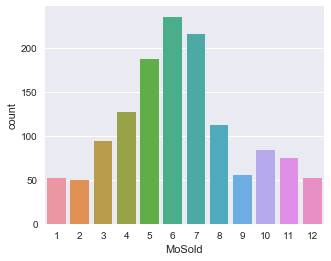

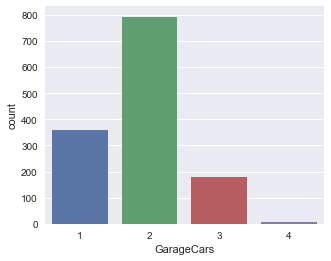

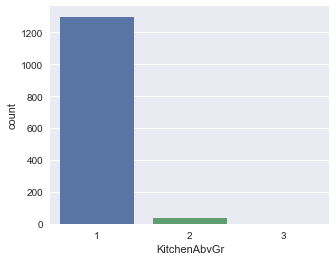

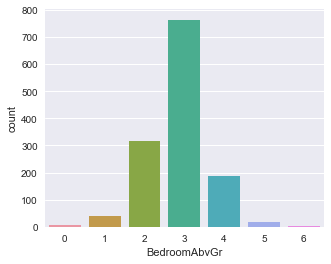

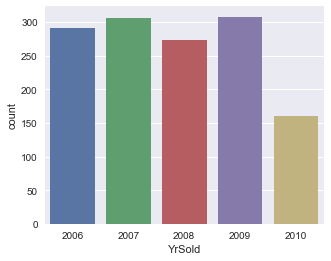

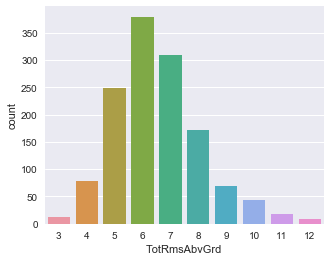

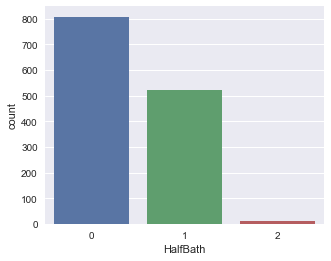

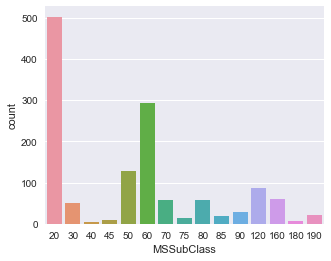

In [48]:
for col in numCatCols:
    sns.set(font_scale = 1)
    f, ax = plt.subplots(figsize=(5,4))
    fig2 = sns.countplot(x=col, data=df_dropped)
    #x = plt.xticks(rotation=90)
    plt.show()

In [18]:
def BoxHist(column, df_focus):
    
    sns.set()
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=10)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

In [19]:
contCols = list(set(numCols)-set(numCatCols)-set(yearCatCols))

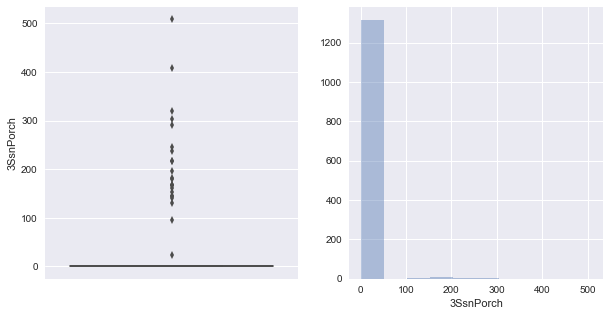

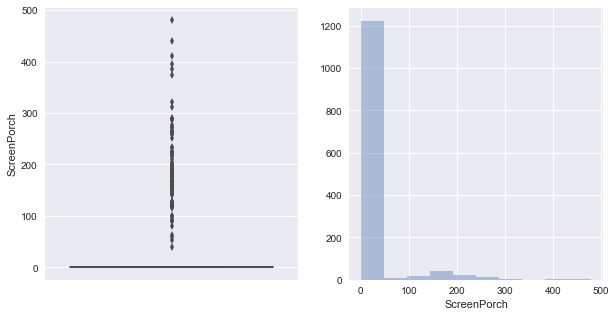

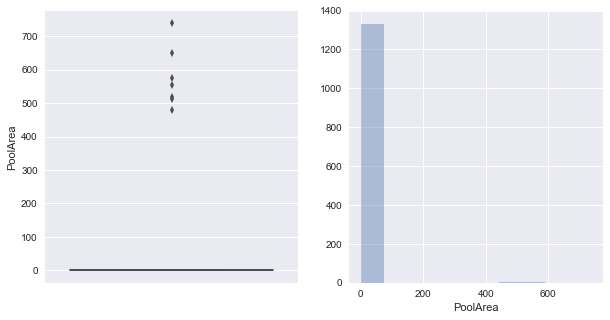

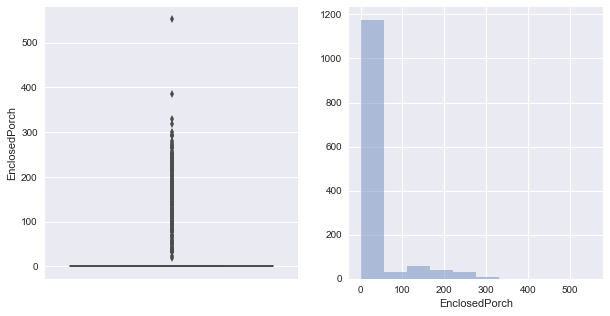

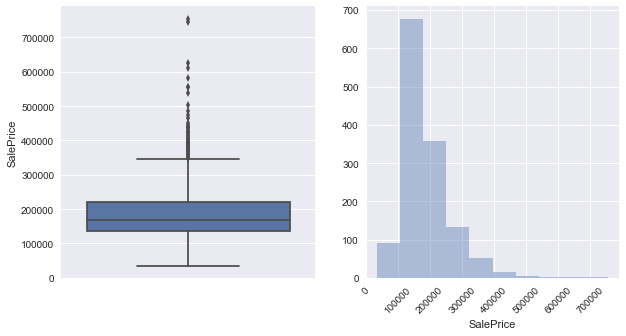

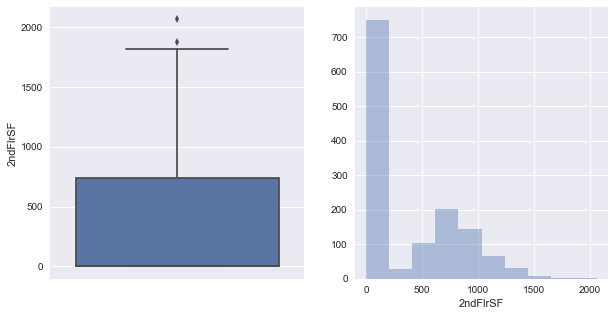

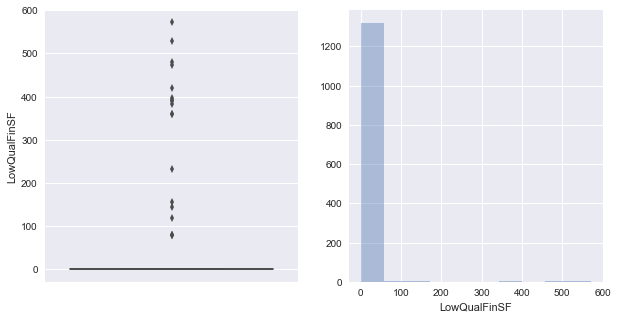

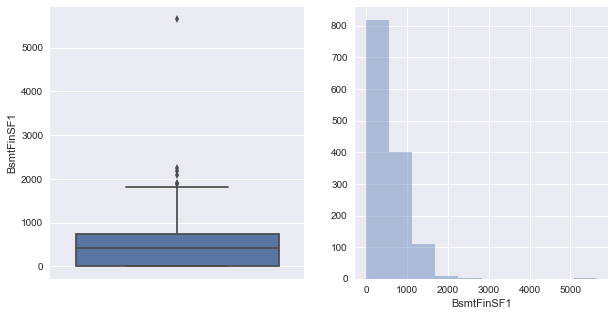

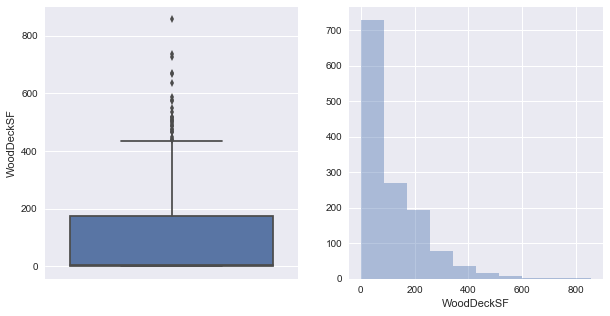

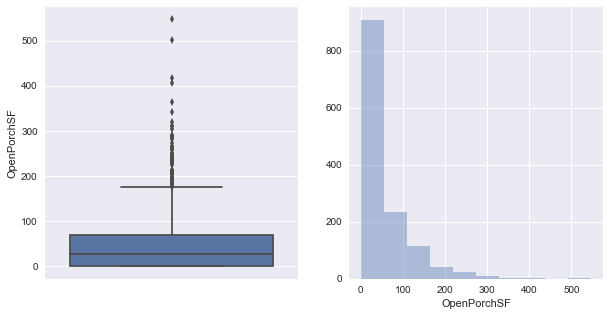

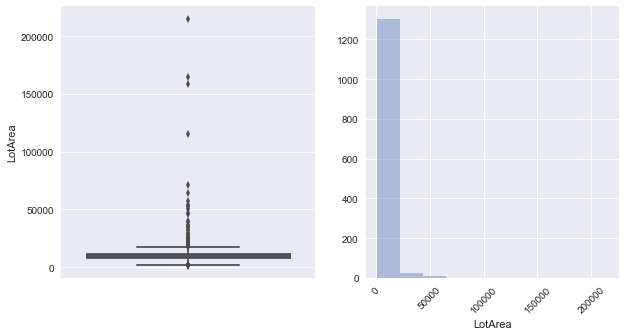

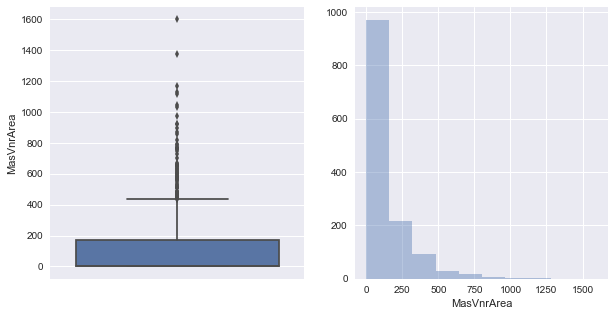

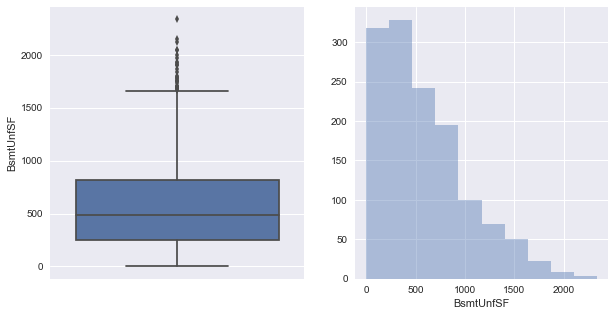

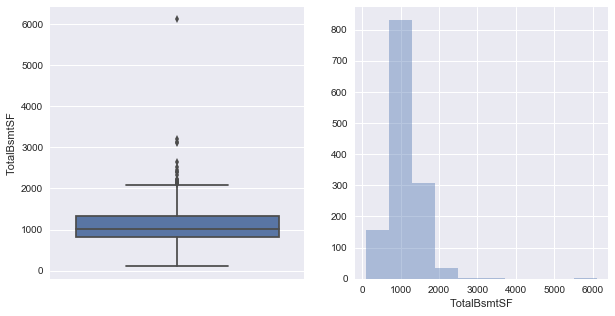

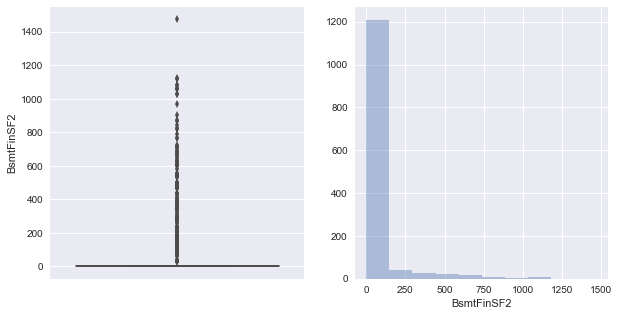

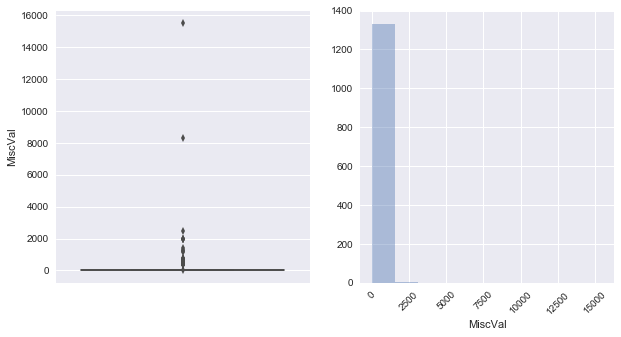

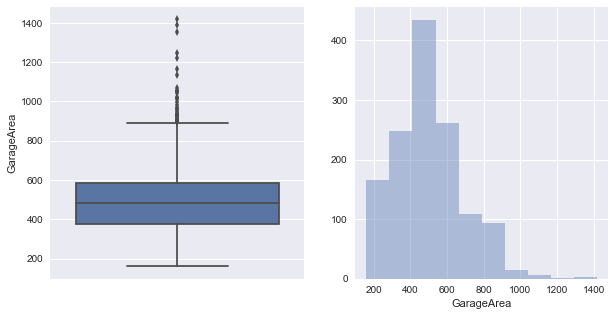

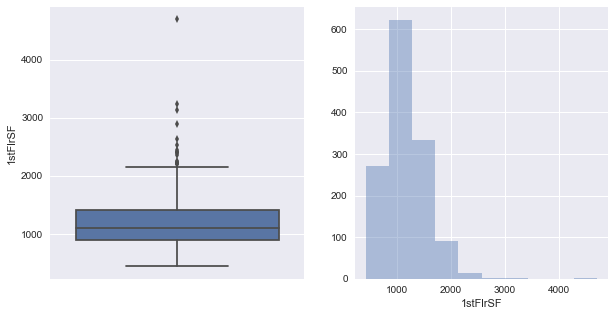

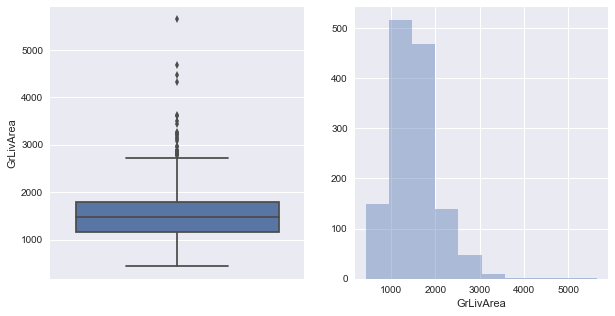

In [20]:
for col in contCols:
    BoxHist(col,df_dropped)

In [21]:
contCols

['3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'EnclosedPorch',
 'SalePrice',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFinSF1',
 'WoodDeckSF',
 'OpenPorchSF',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFinSF2',
 'MiscVal',
 'GarageArea',
 '1stFlrSF',
 'GrLivArea']

In [22]:
corrmat = df_dropped[contCols].corr()
display(corrmat[abs(corrmat.SalePrice) >= .30].SalePrice.sort_values(ascending=False))
contColsHighCorr = corrmat[abs(corrmat.SalePrice) >= .30].SalePrice.sort_values(ascending=False).index
contColsLowCorr = list(set(contCols)-set(contColsHighCorr))

SalePrice      1.000000
GrLivArea      0.711706
GarageArea     0.607535
1stFlrSF       0.604714
TotalBsmtSF    0.602042
MasVnrArea     0.465811
BsmtFinSF1     0.359677
OpenPorchSF    0.322786
2ndFlrSF       0.311354
WoodDeckSF     0.305983
Name: SalePrice, dtype: float64

In [23]:
#df_dropped['ScreenPorch']
df_dropped[contCols].shape

(1338, 19)

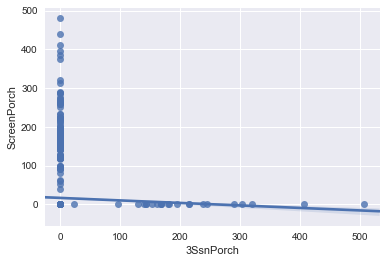

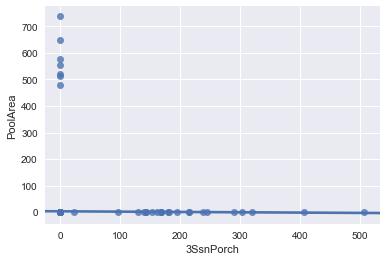

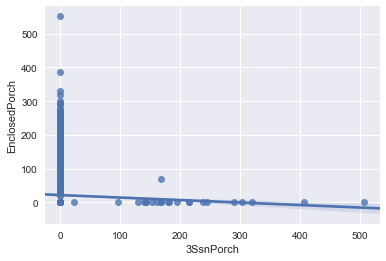

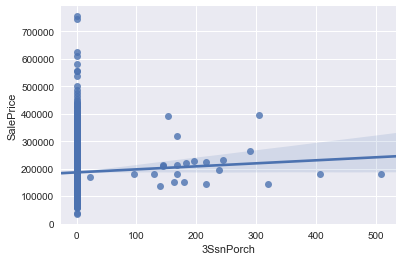

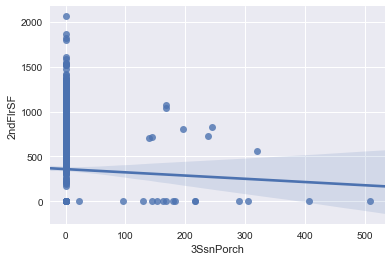

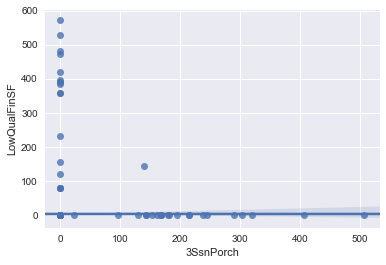

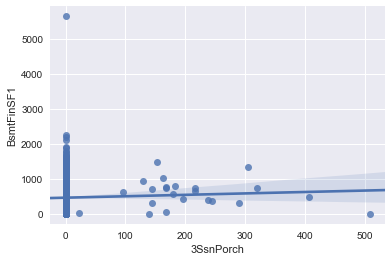

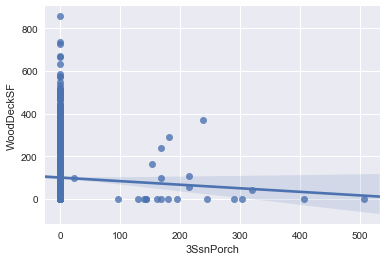

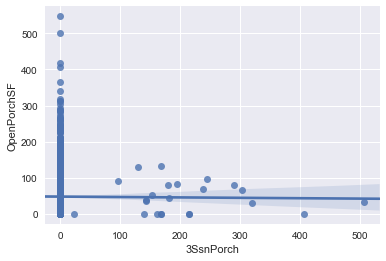

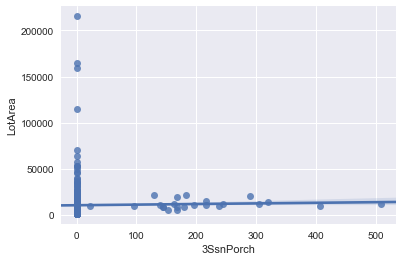

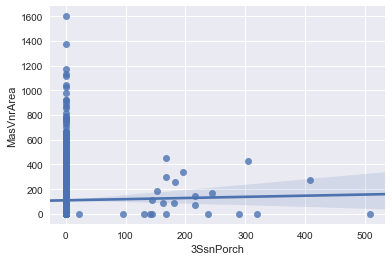

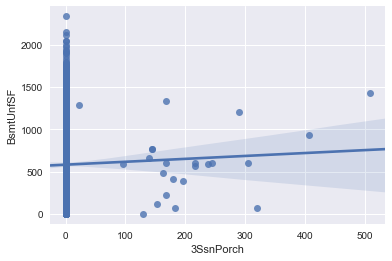

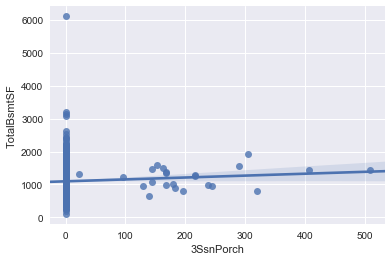

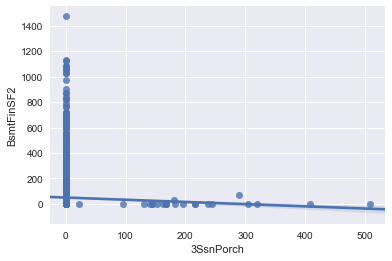

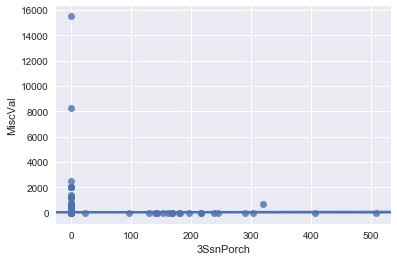

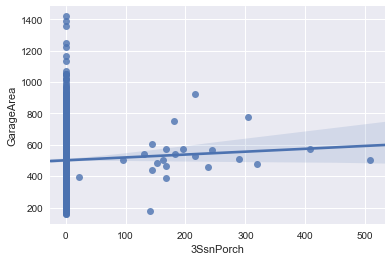

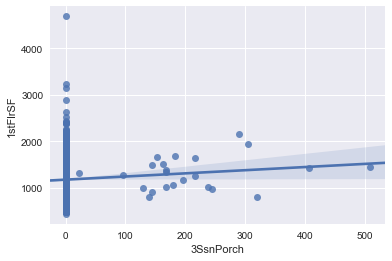

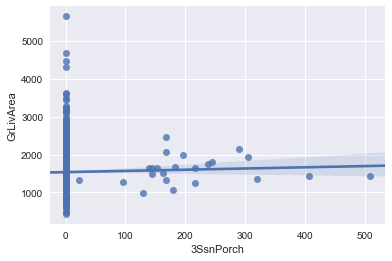

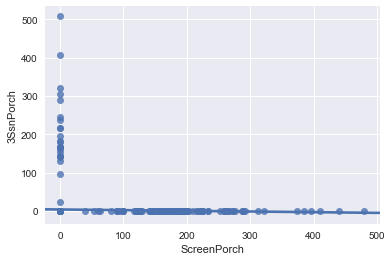

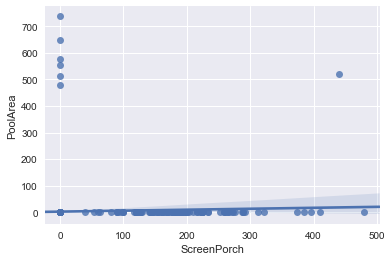

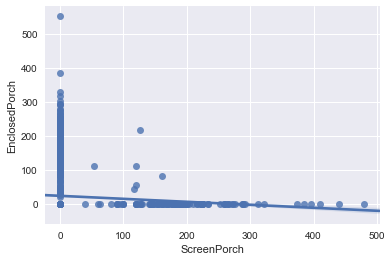

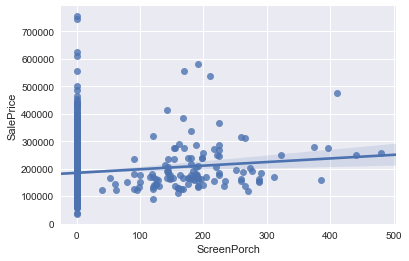

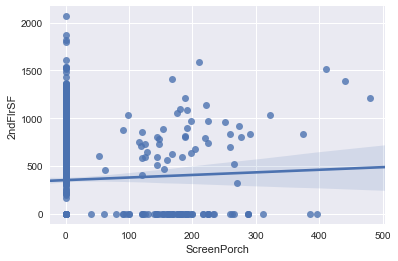

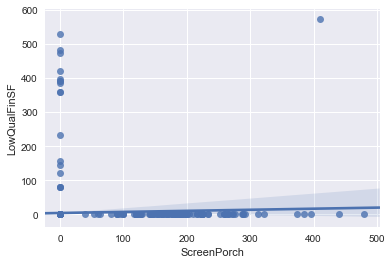

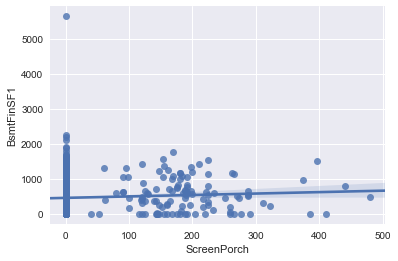

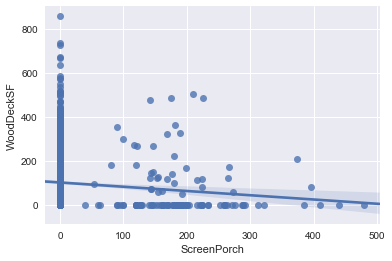

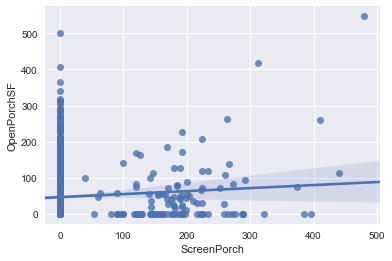

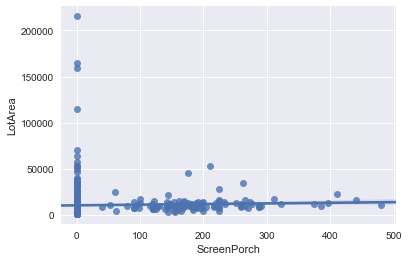

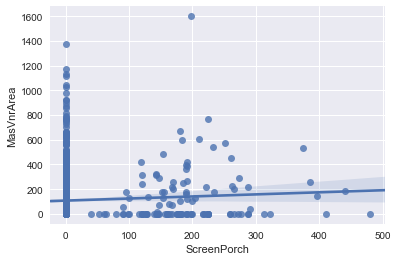

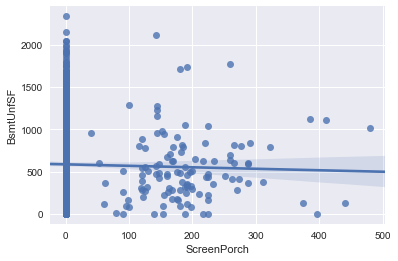

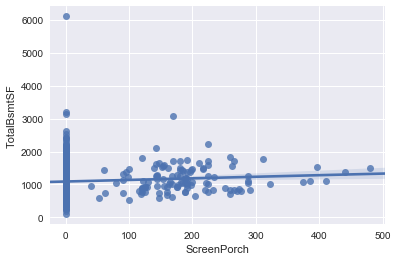

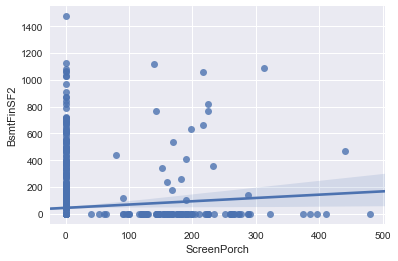

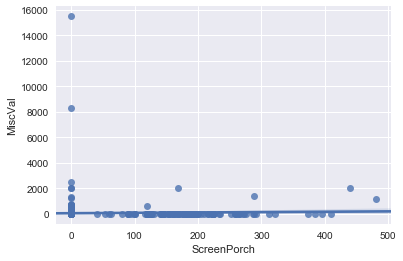

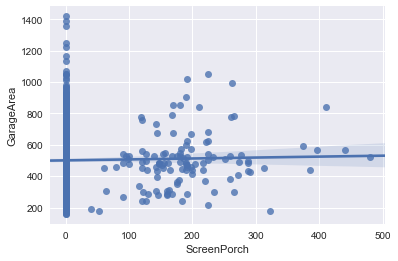

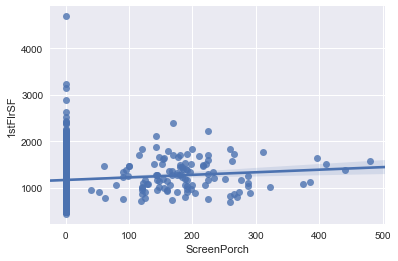

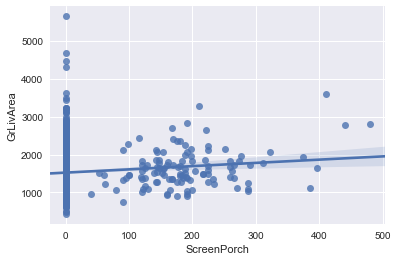

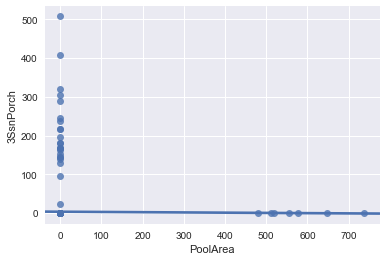

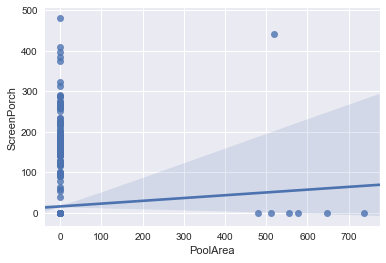

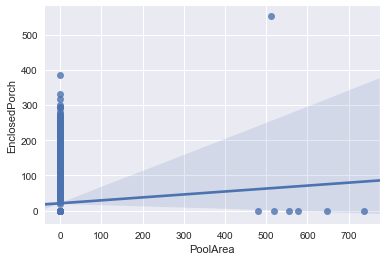

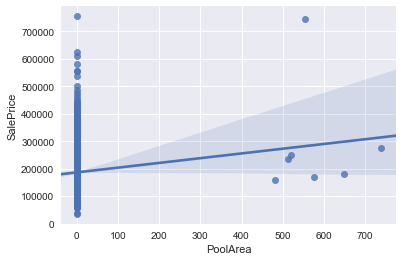

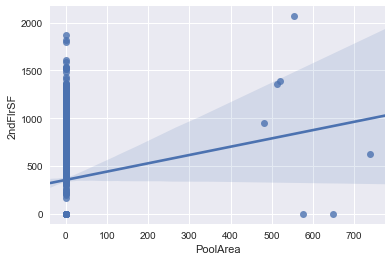

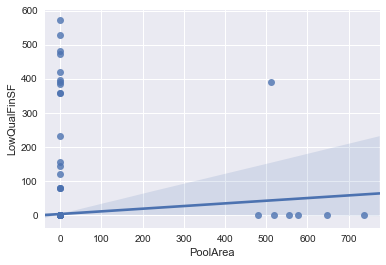

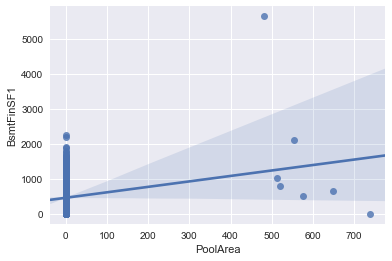

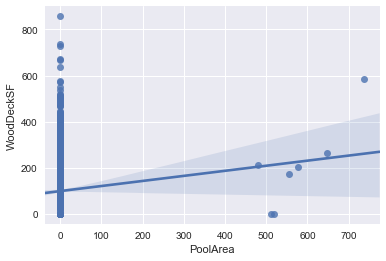

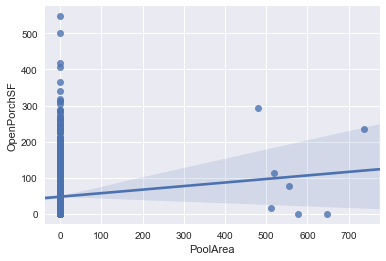

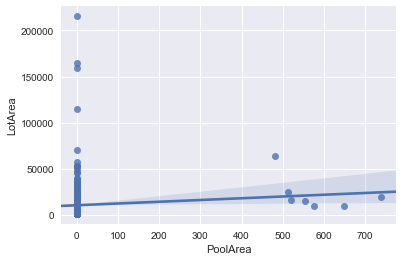

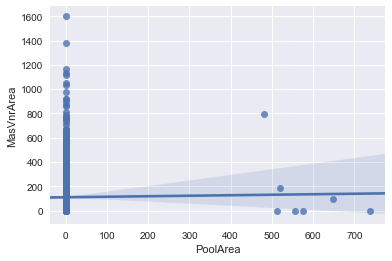

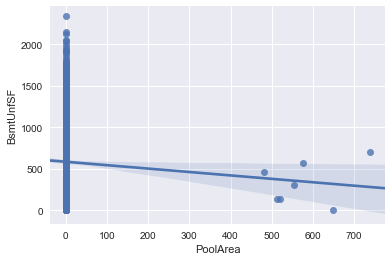

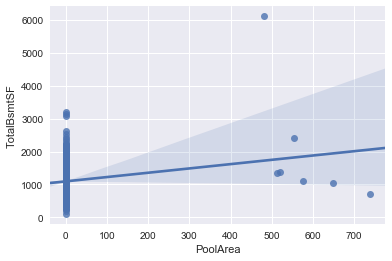

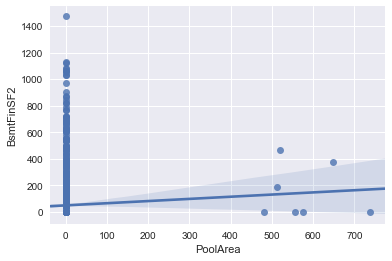

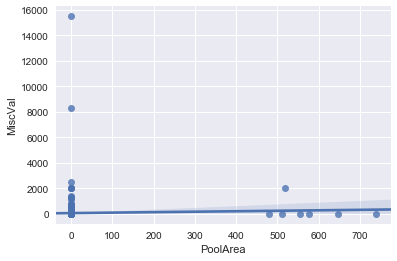

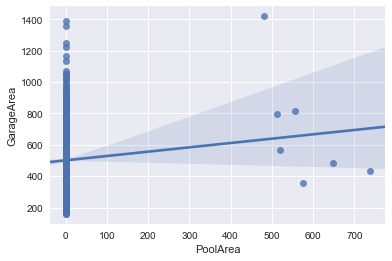

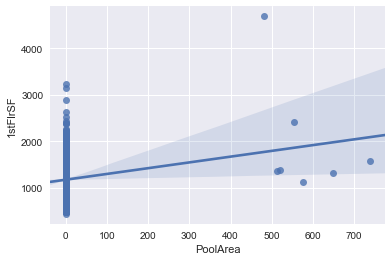

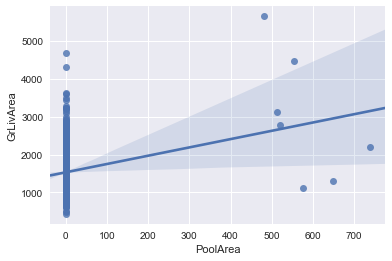

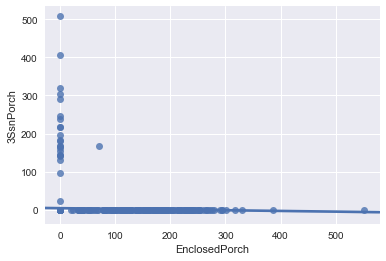

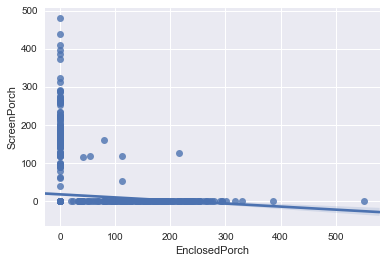

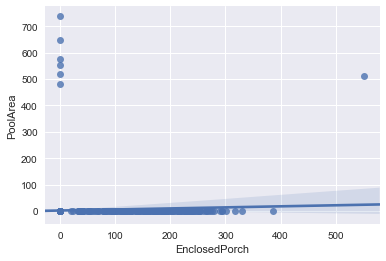

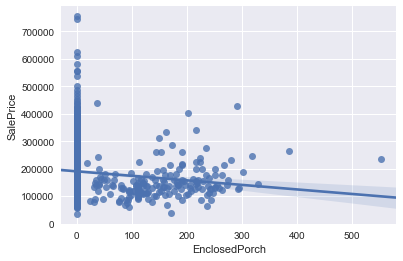

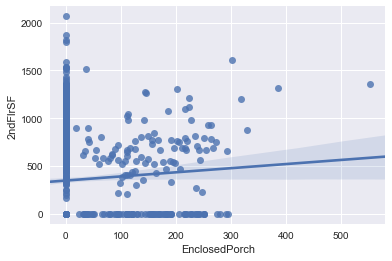

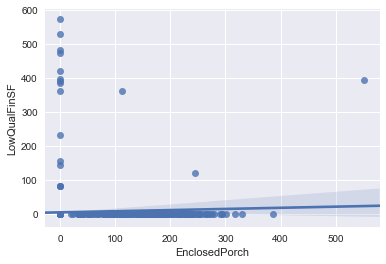

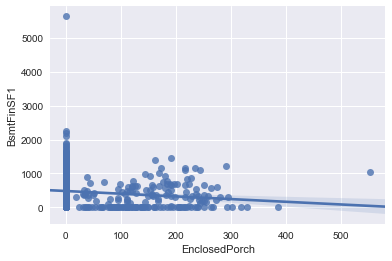

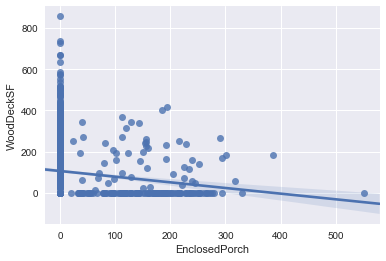

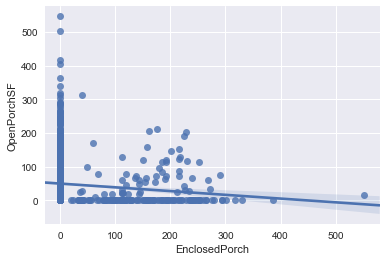

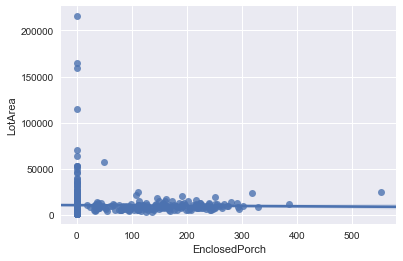

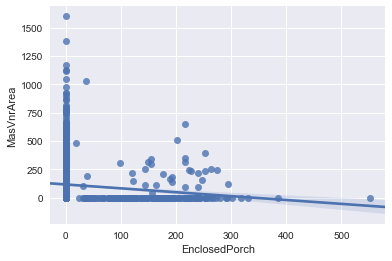

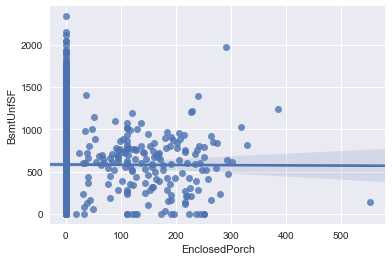

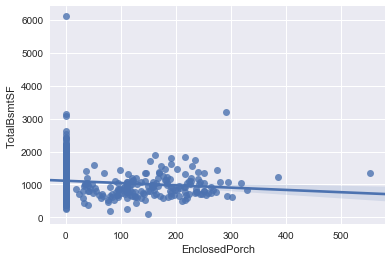

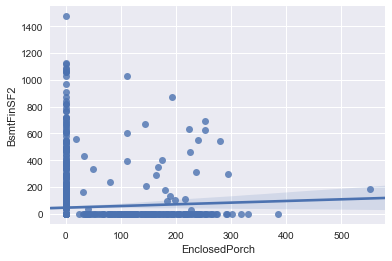

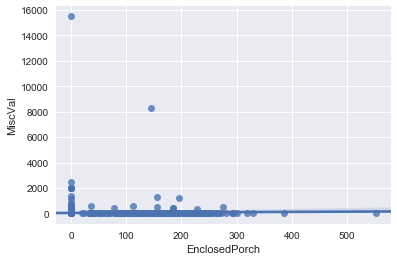

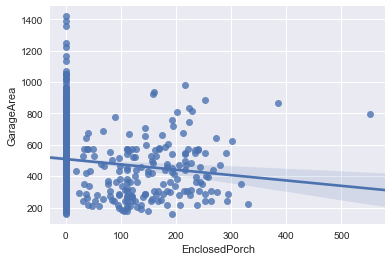

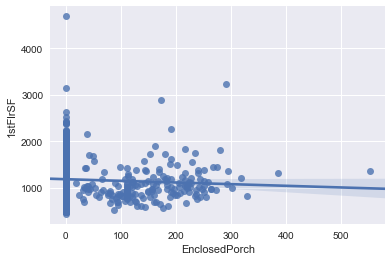

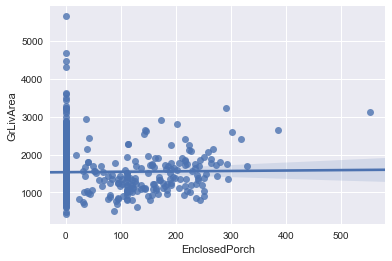

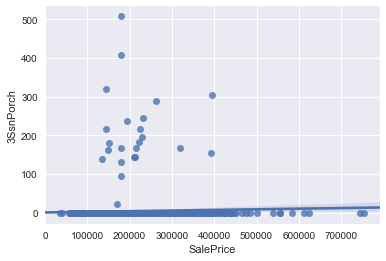

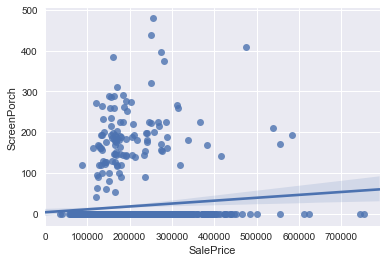

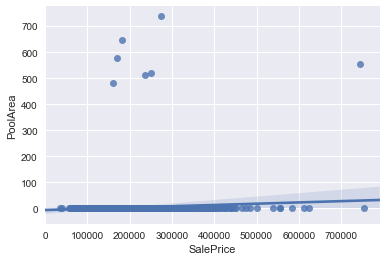

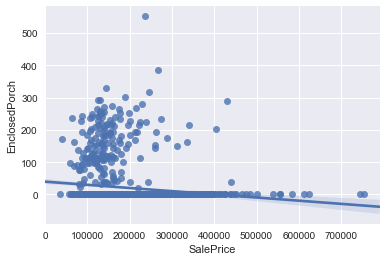

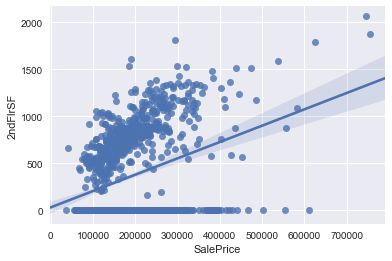

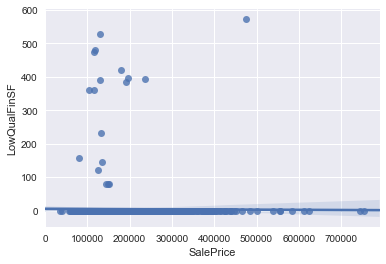

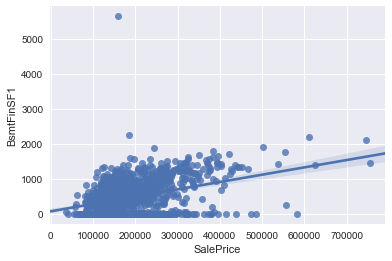

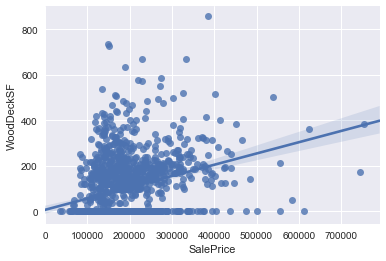

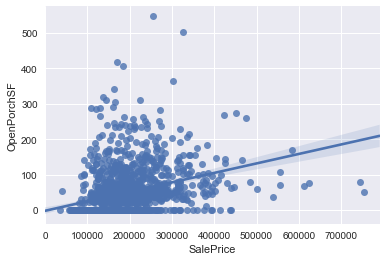

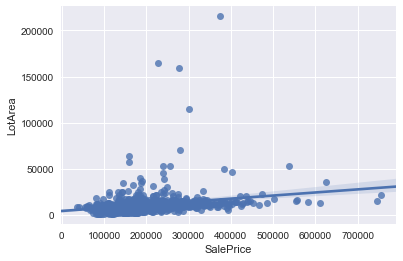

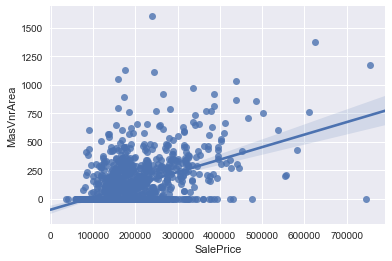

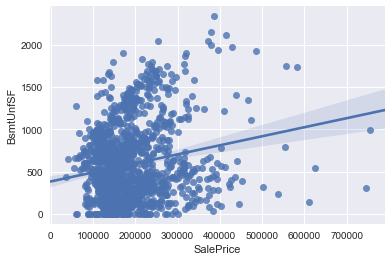

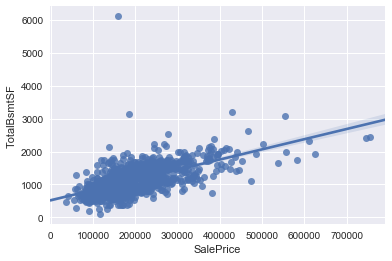

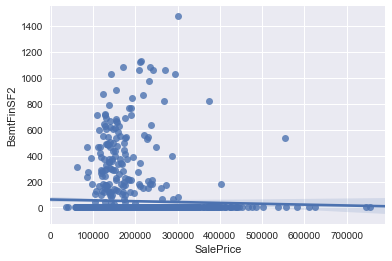

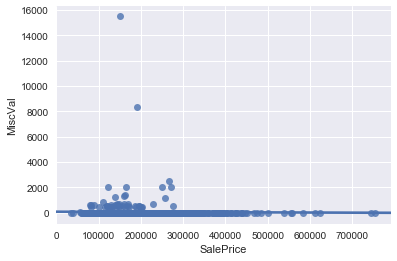

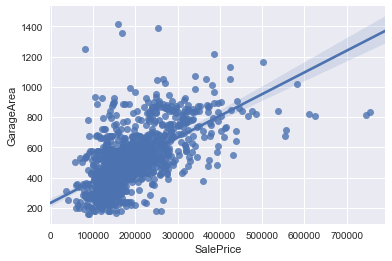

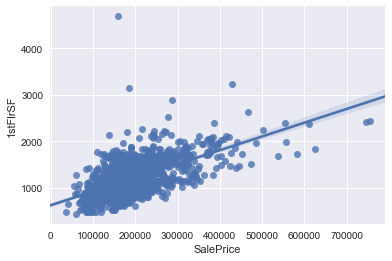

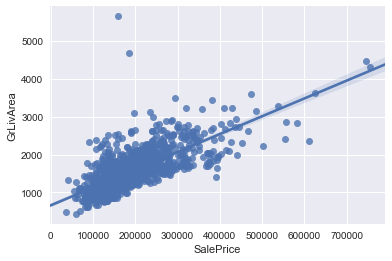

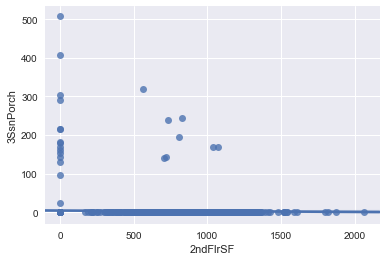

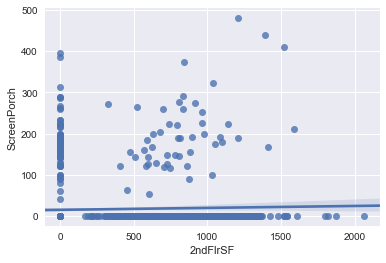

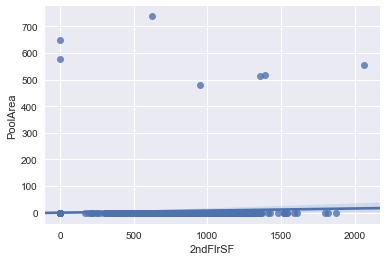

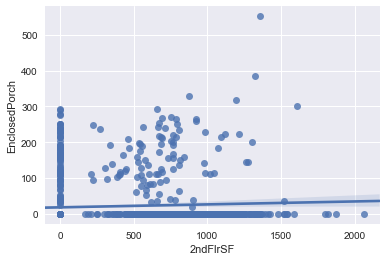

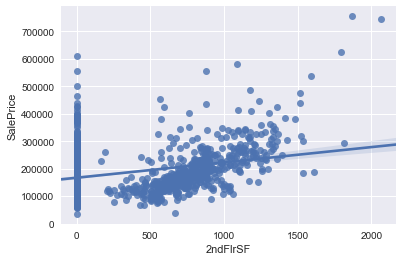

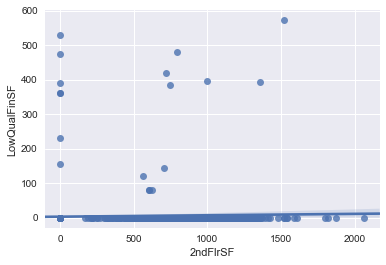

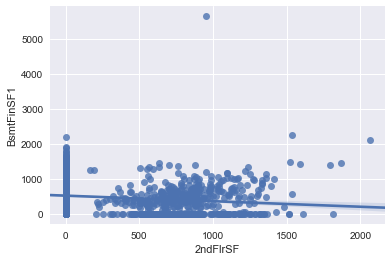

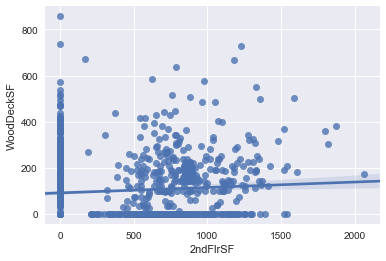

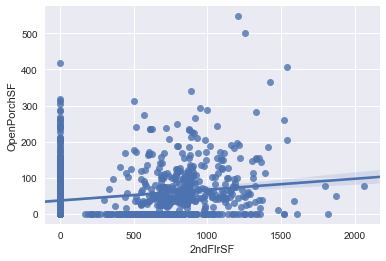

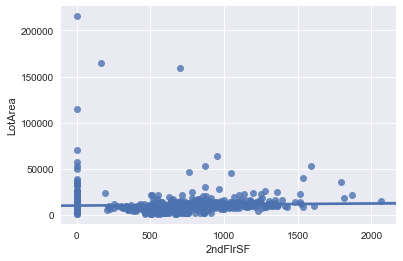

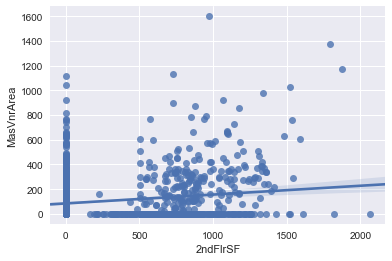

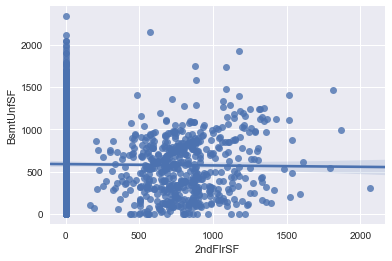

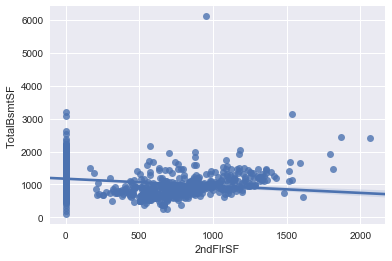

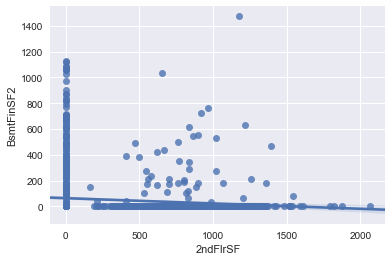

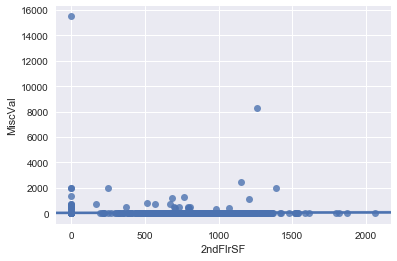

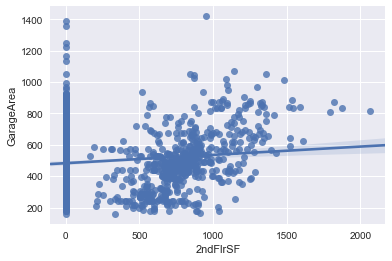

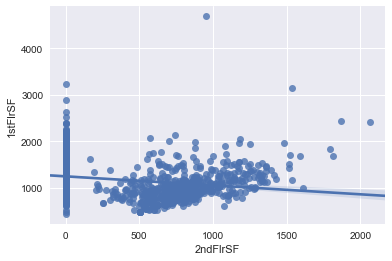

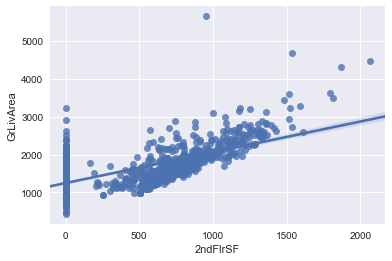

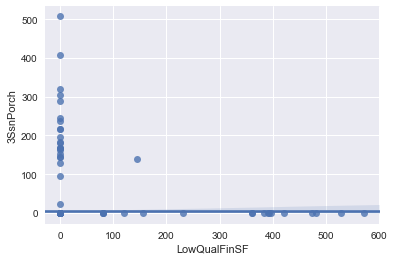

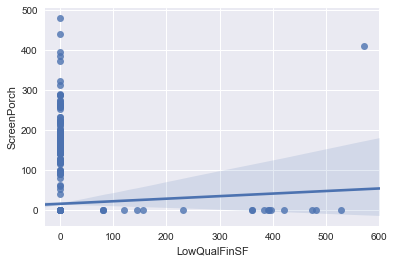

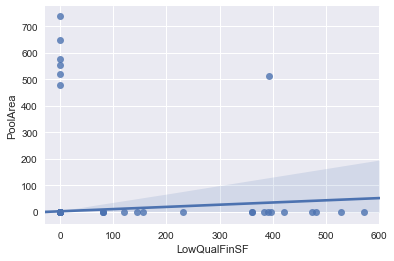

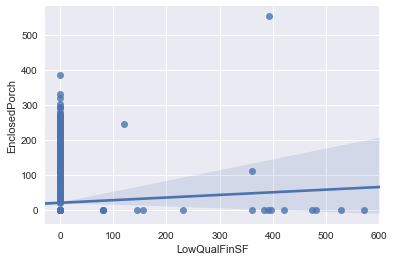

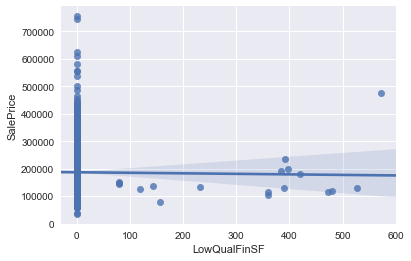

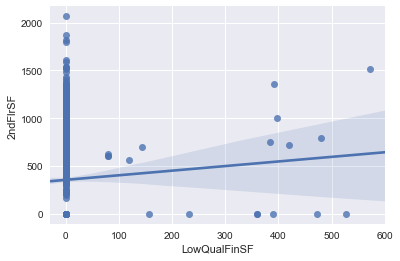

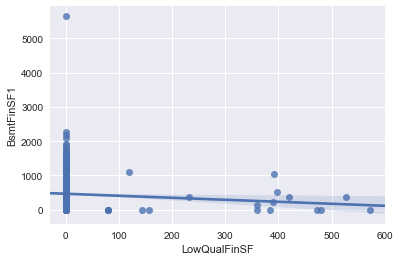

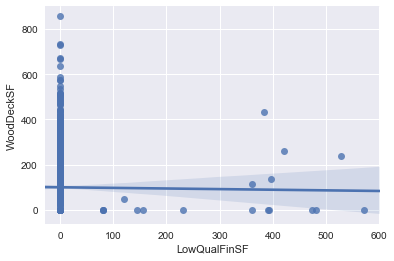

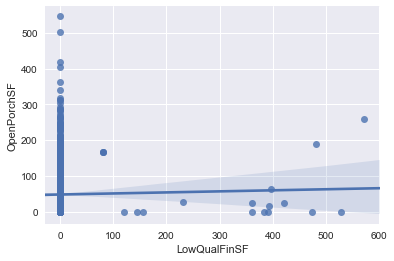

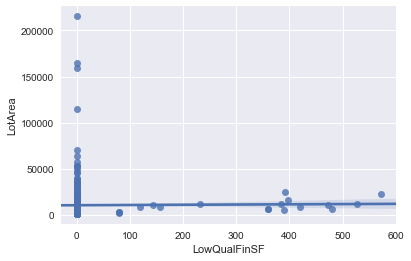

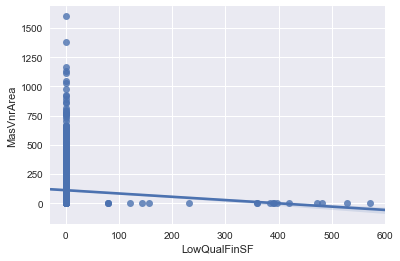

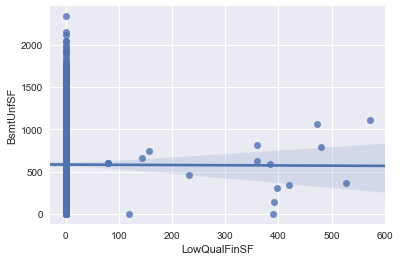

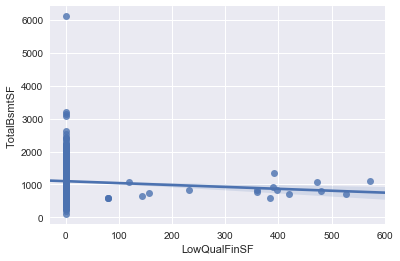

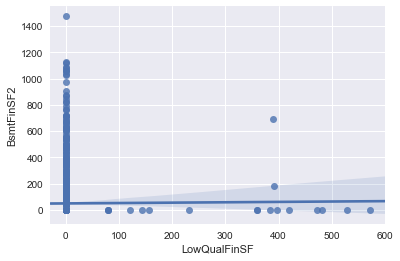

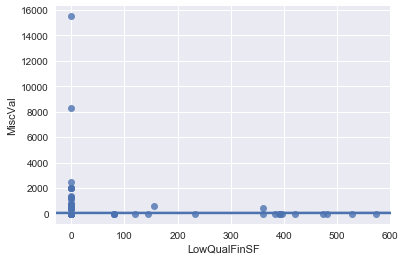

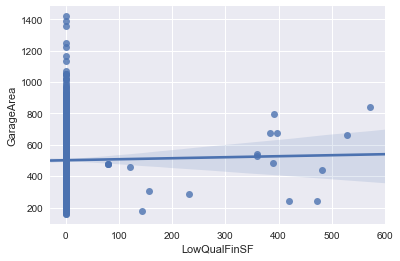

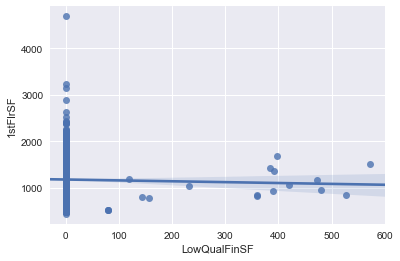

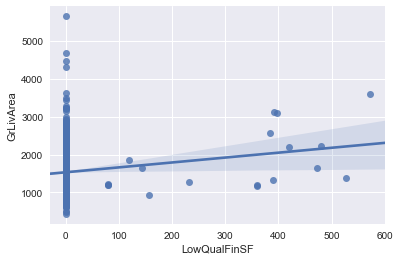

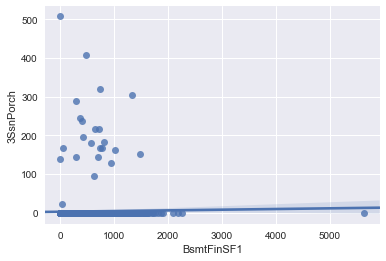

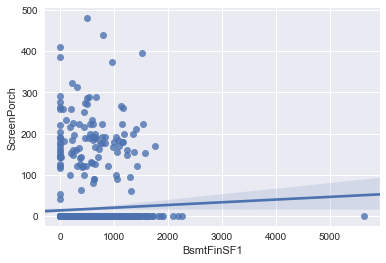

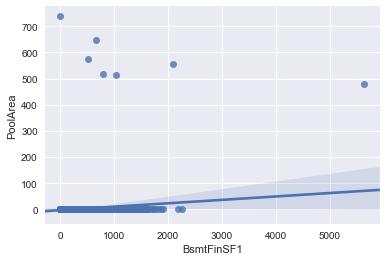

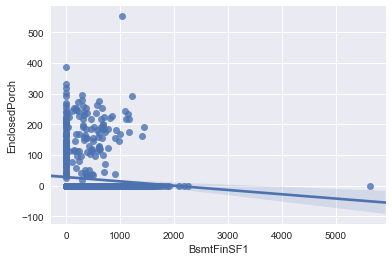

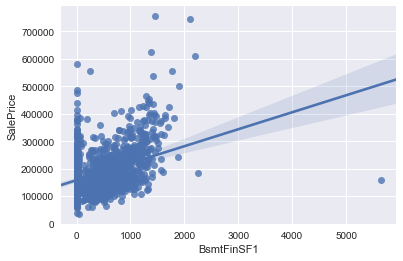

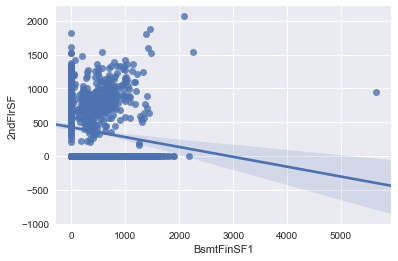

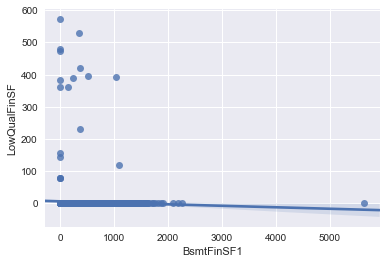

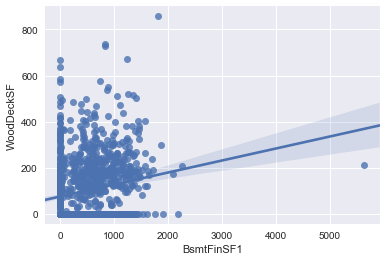

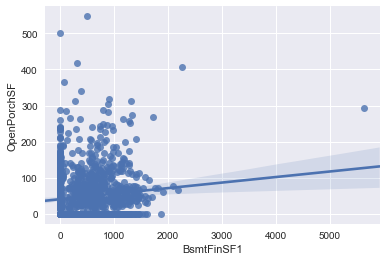

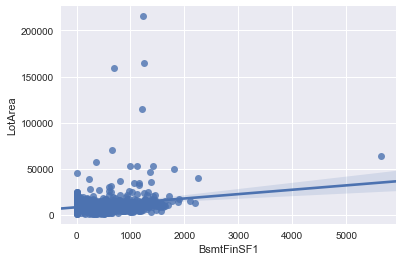

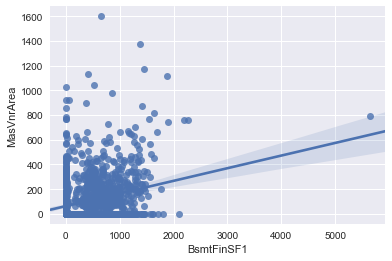

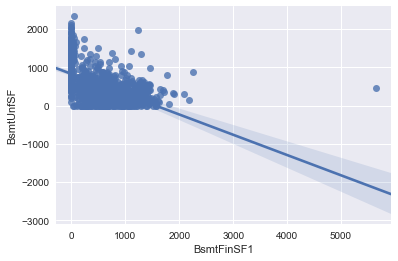

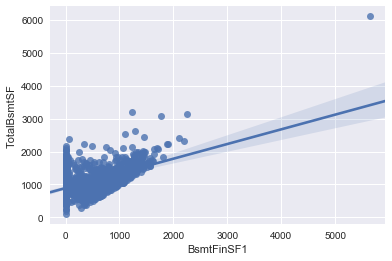

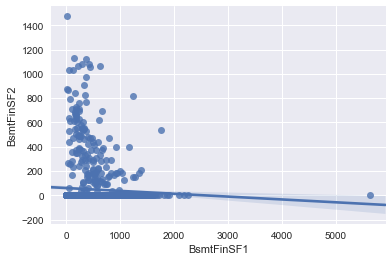

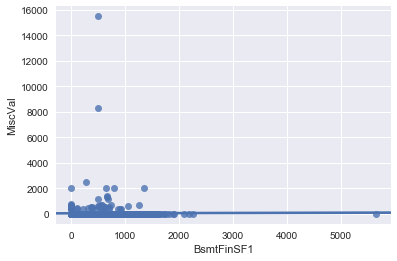

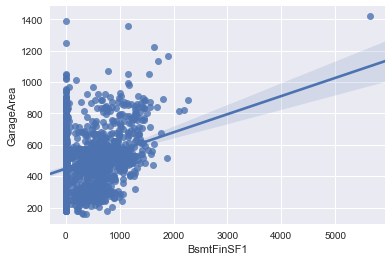

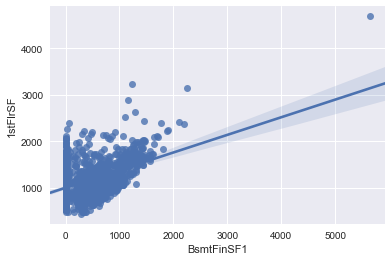

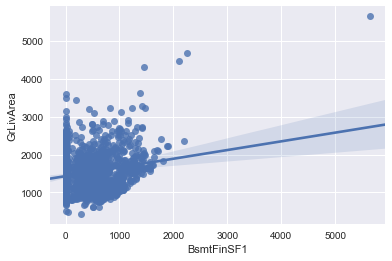

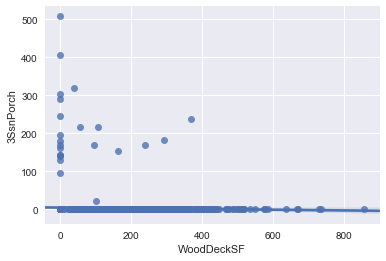

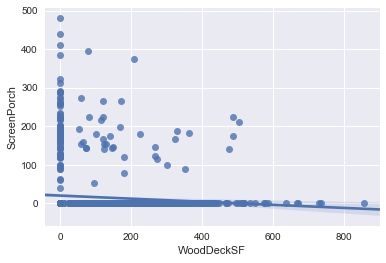

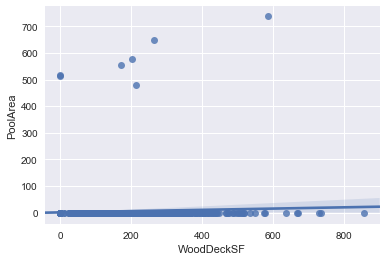

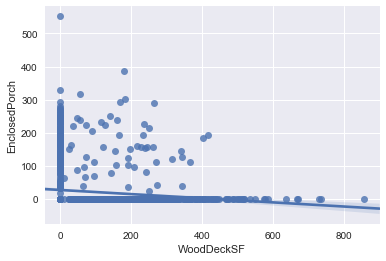

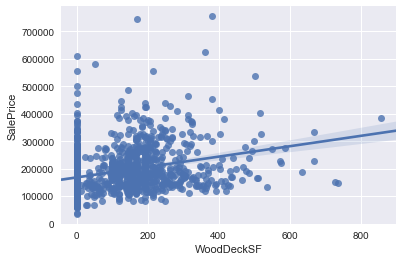

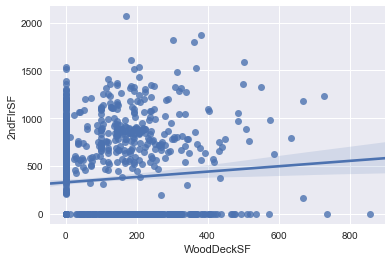

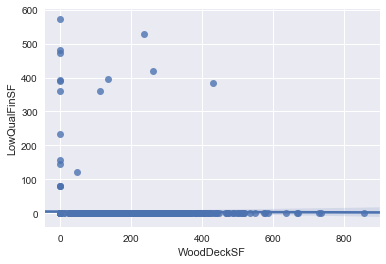

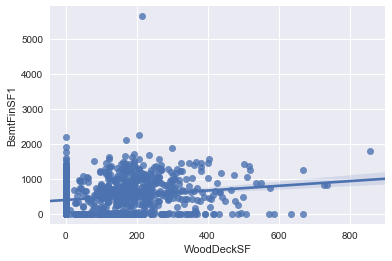

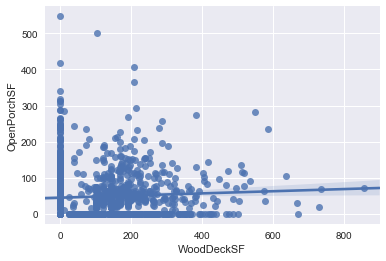

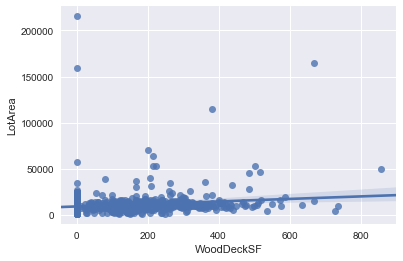

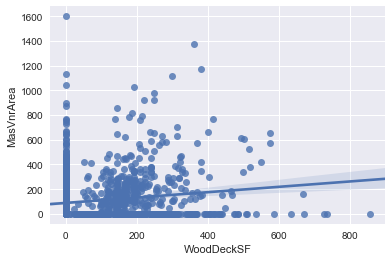

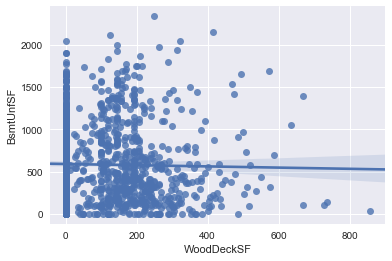

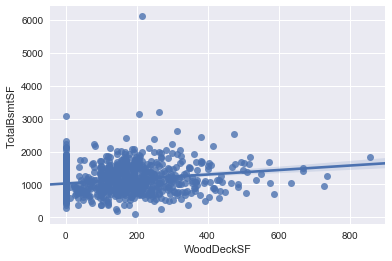

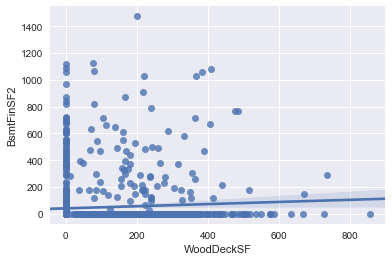

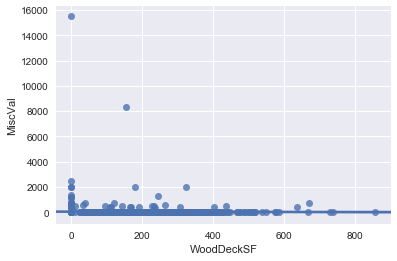

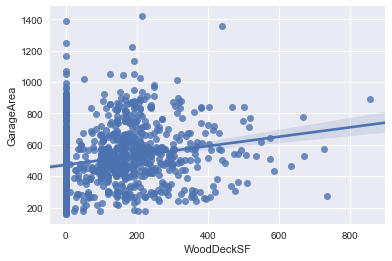

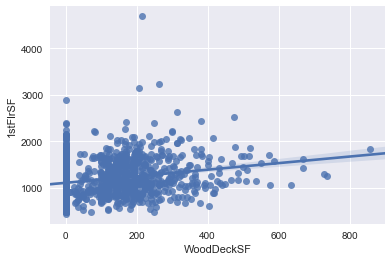

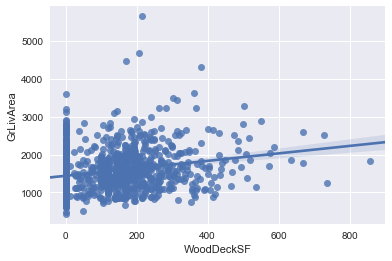

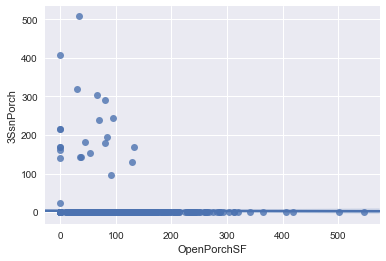

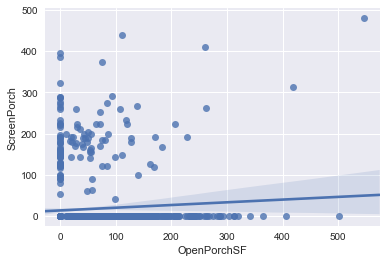

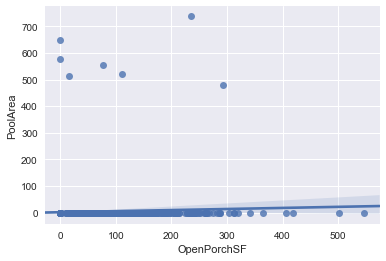

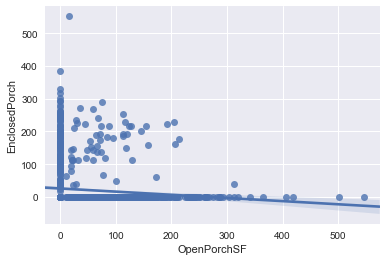

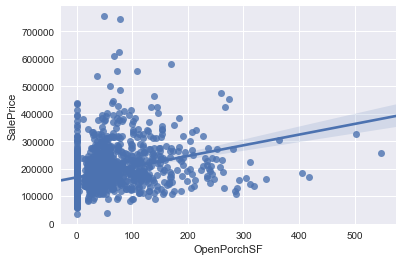

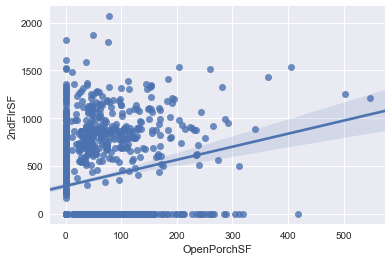

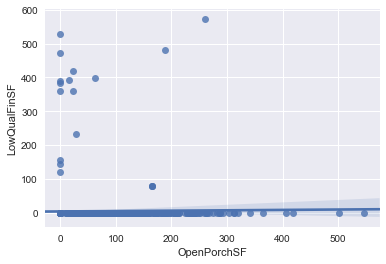

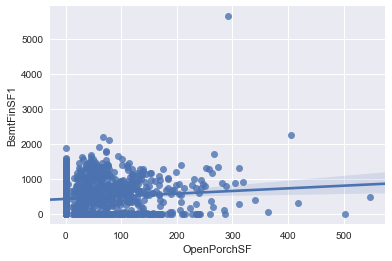

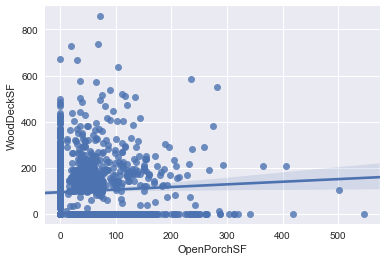

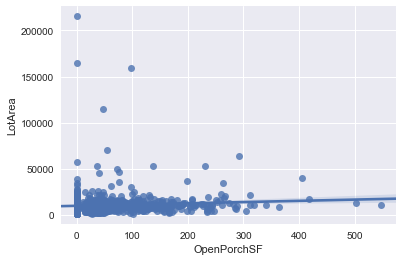

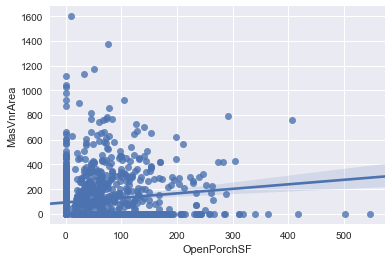

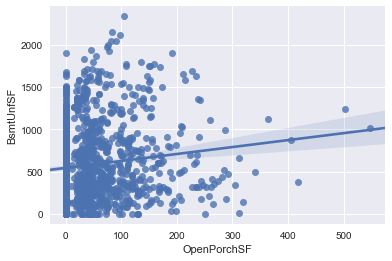

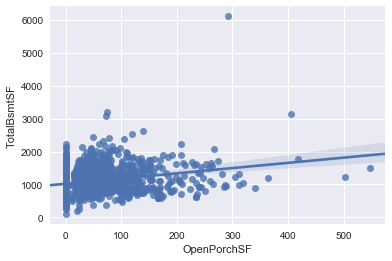

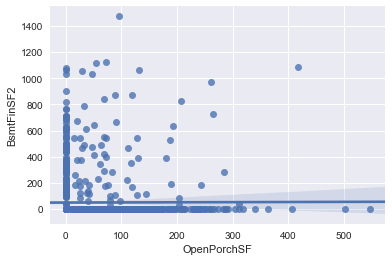

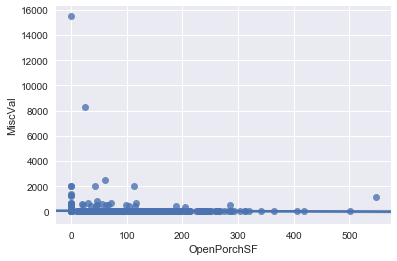

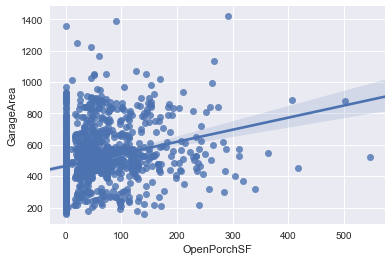

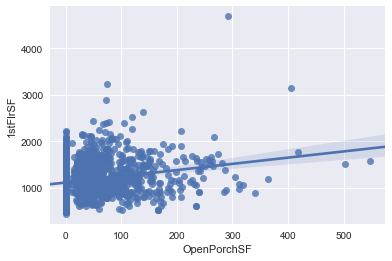

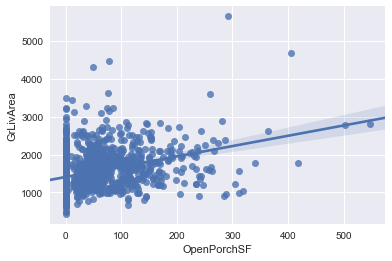

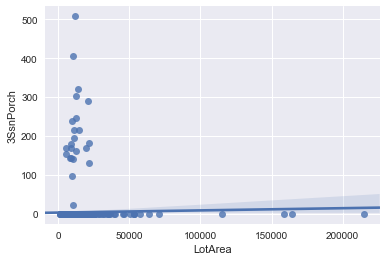

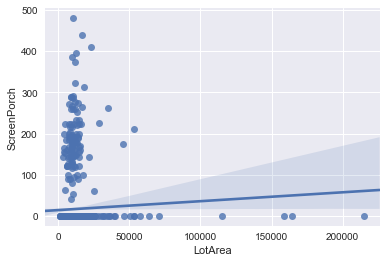

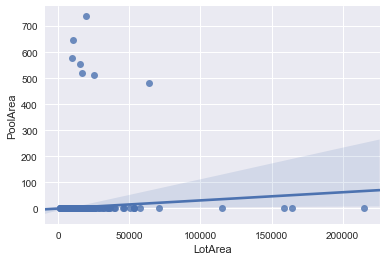

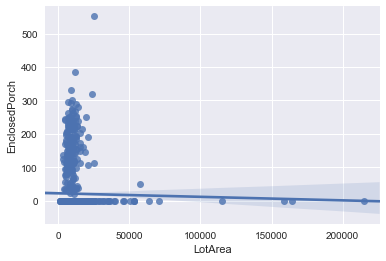

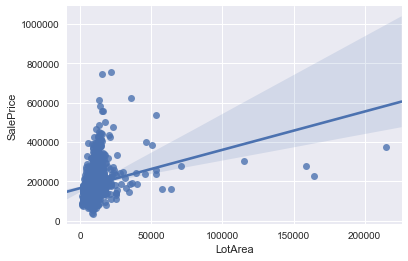

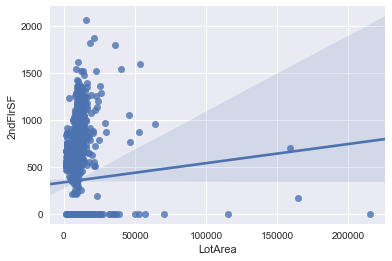

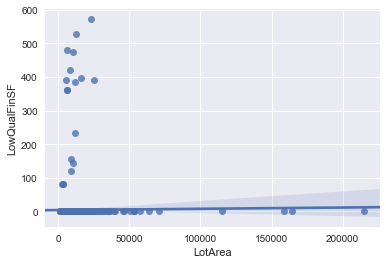

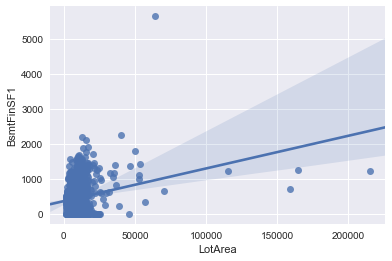

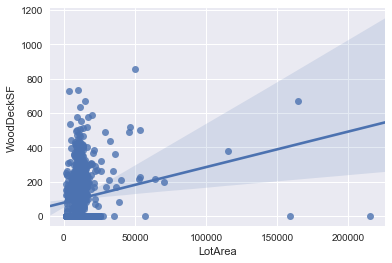

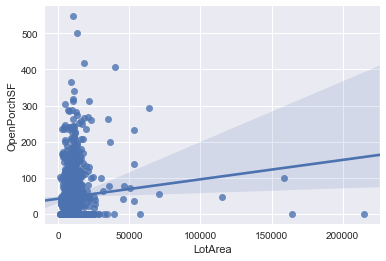

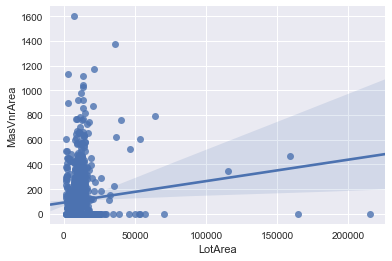

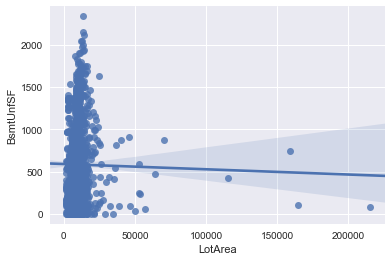

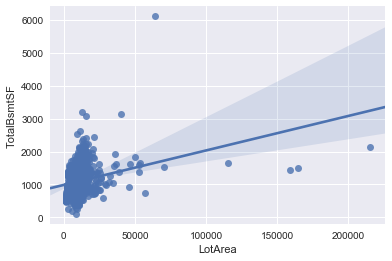

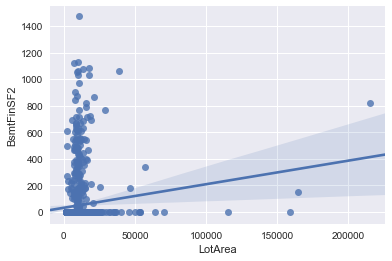

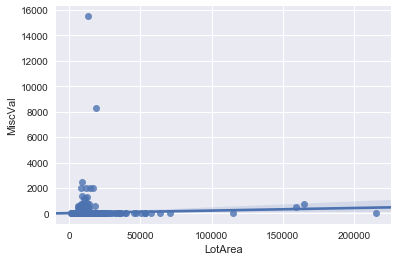

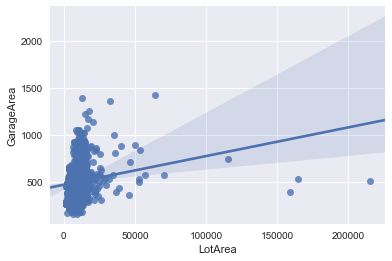

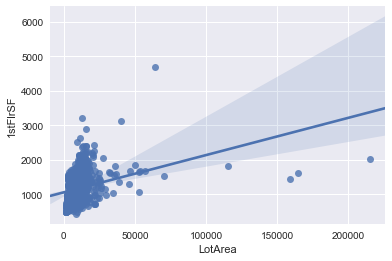

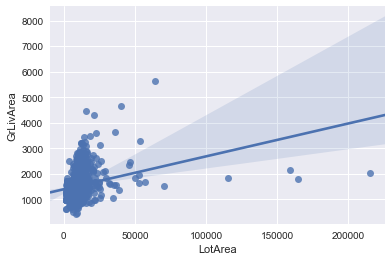

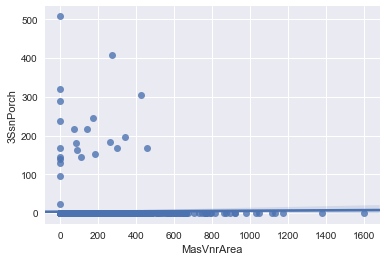

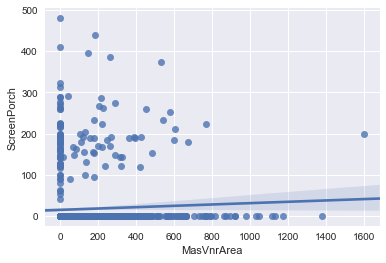

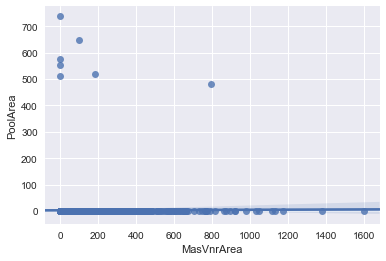

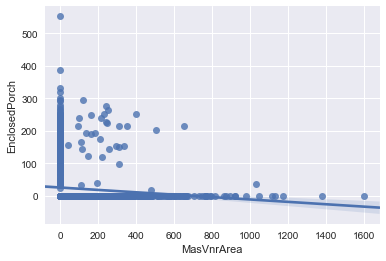

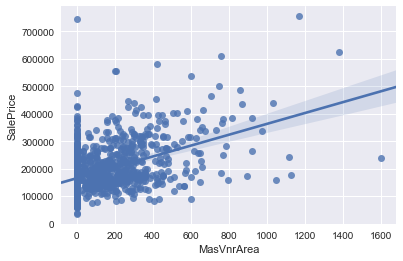

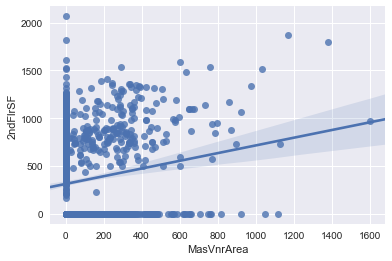

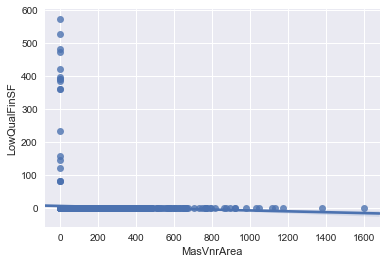

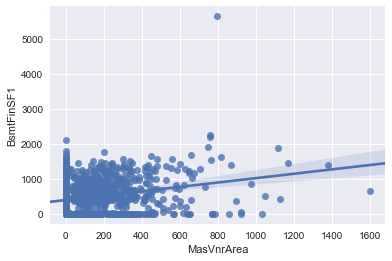

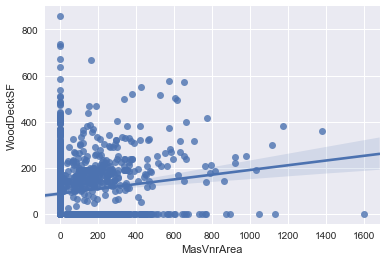

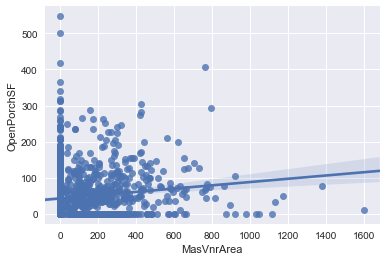

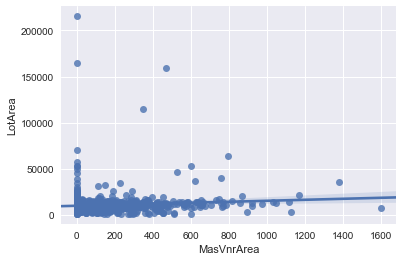

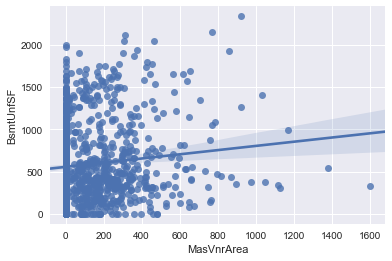

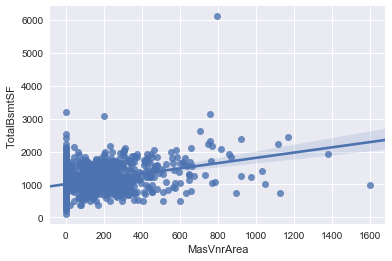

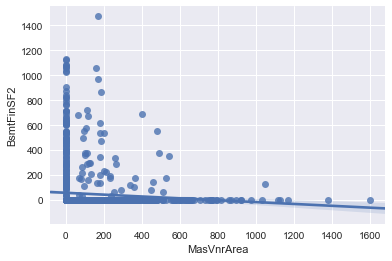

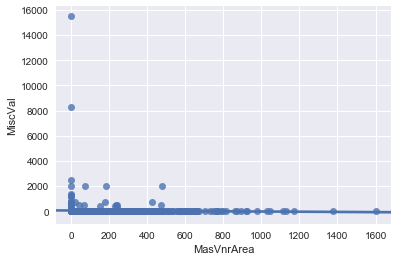

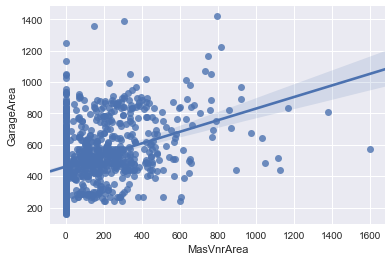

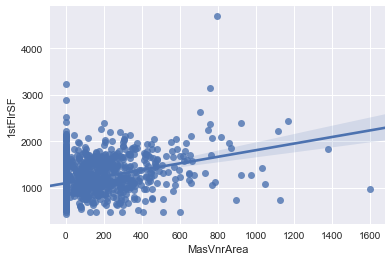

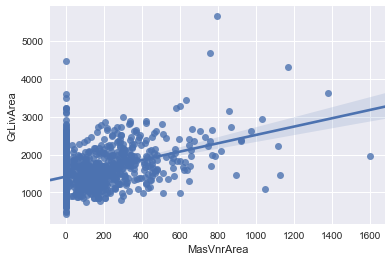

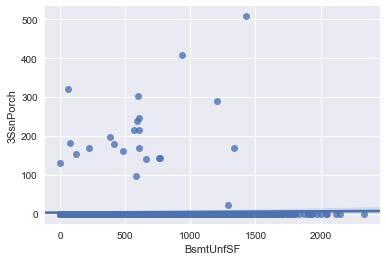

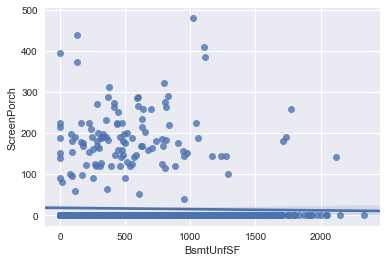

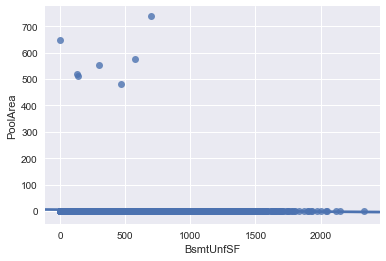

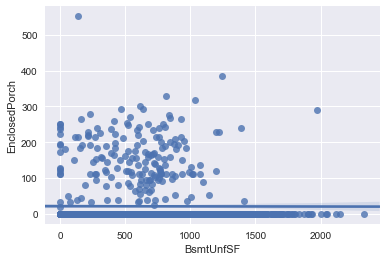

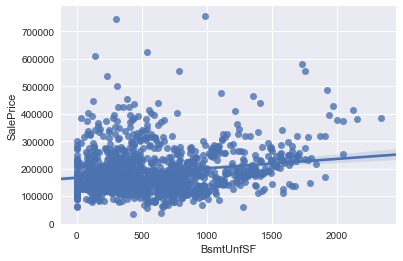

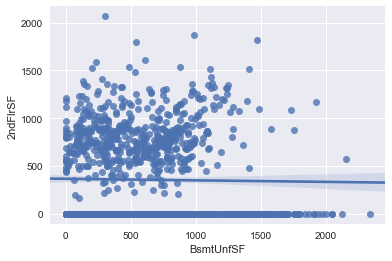

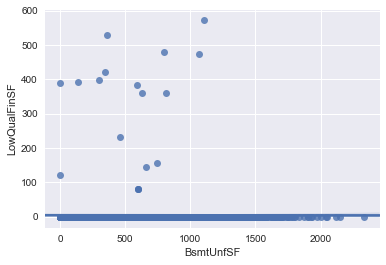

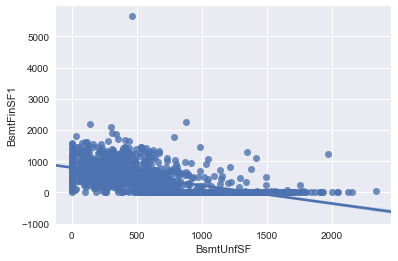

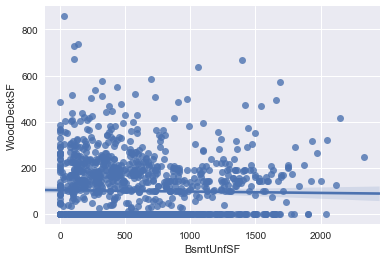

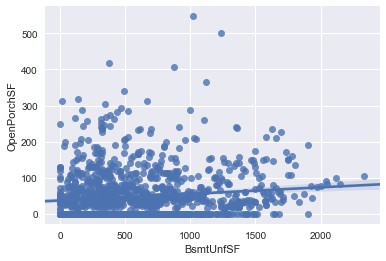

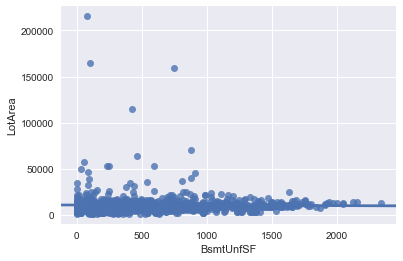

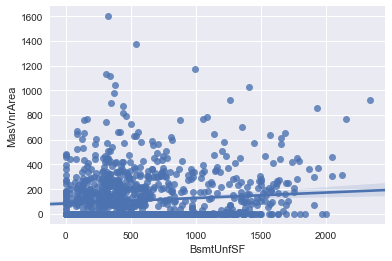

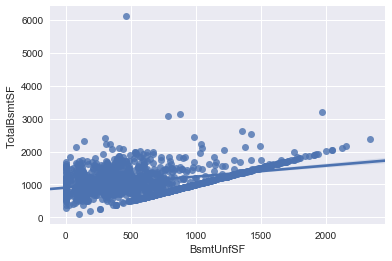

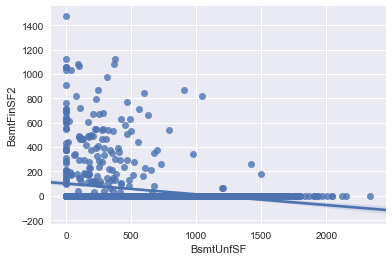

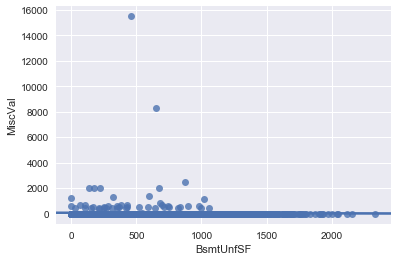

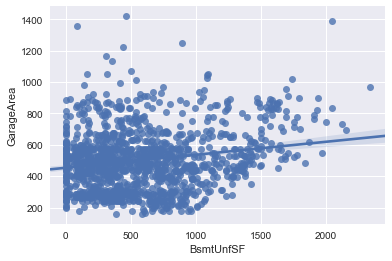

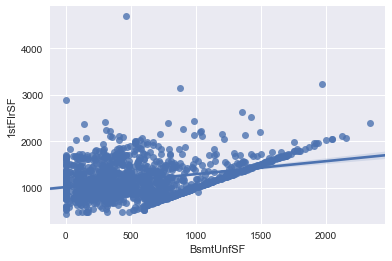

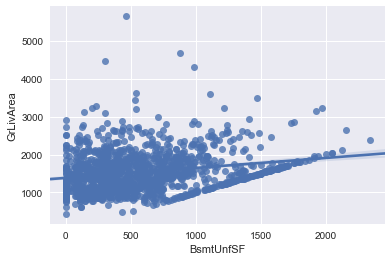

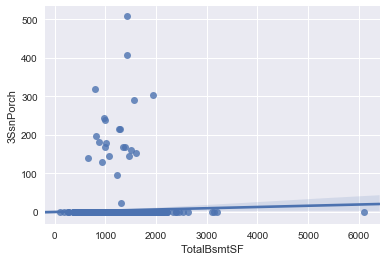

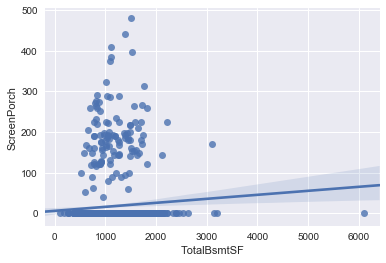

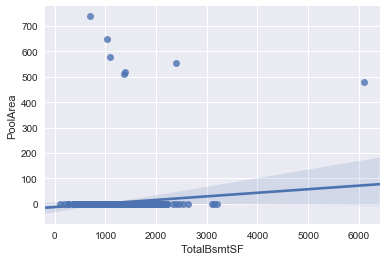

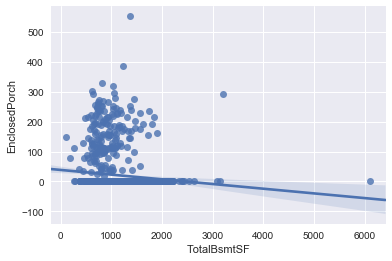

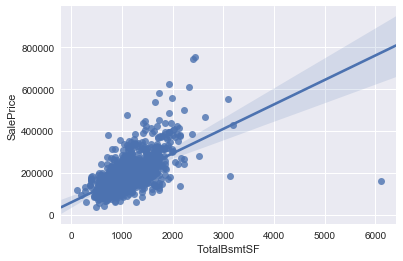

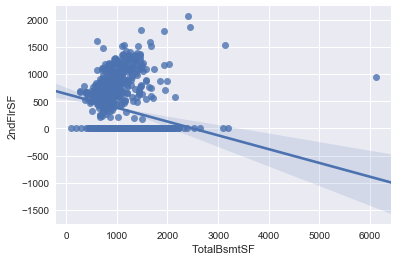

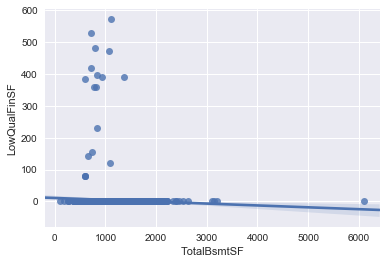

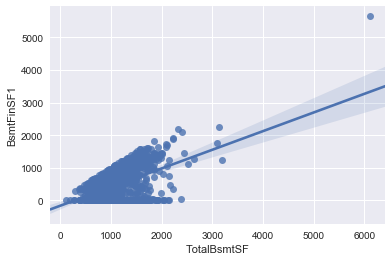

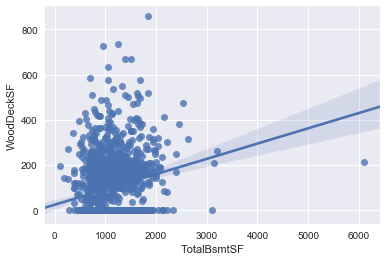

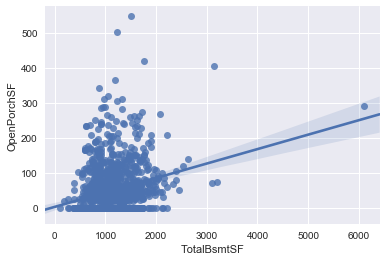

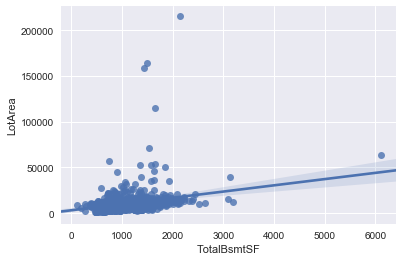

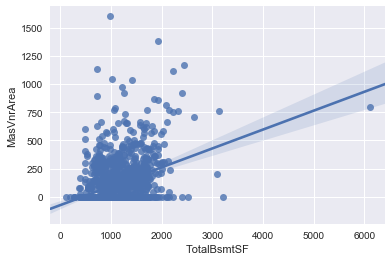

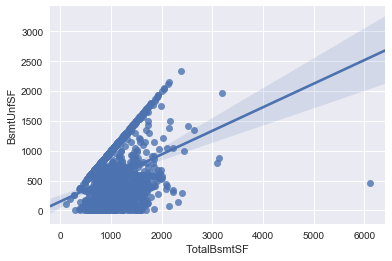

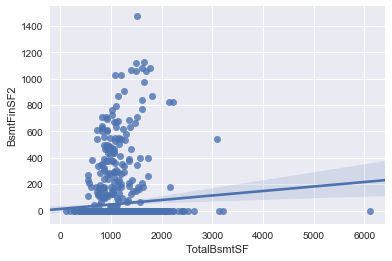

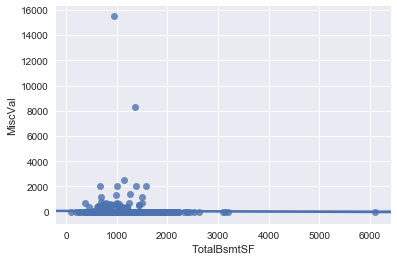

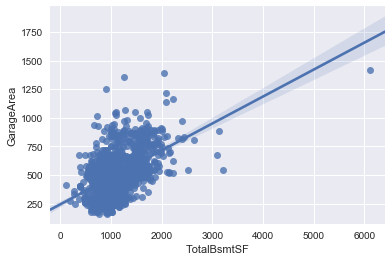

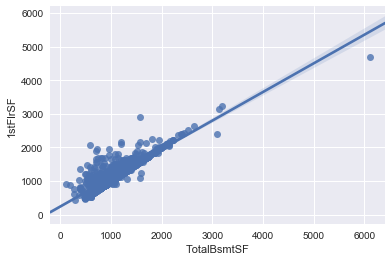

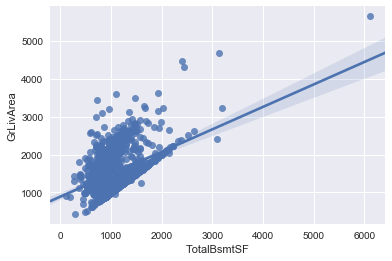

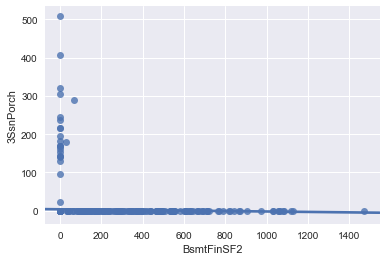

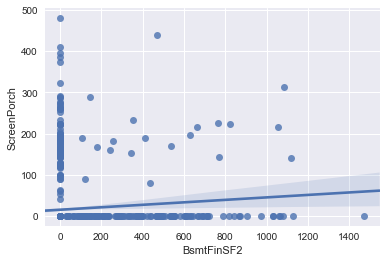

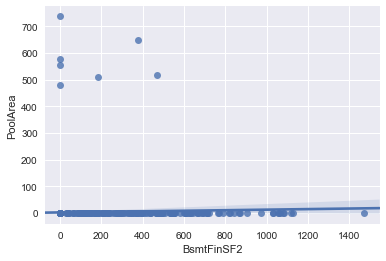

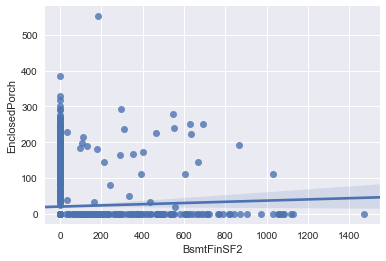

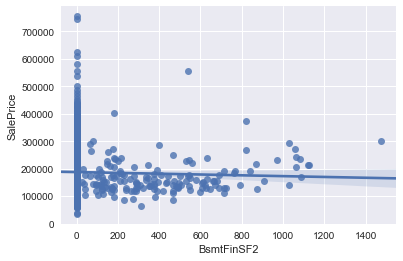

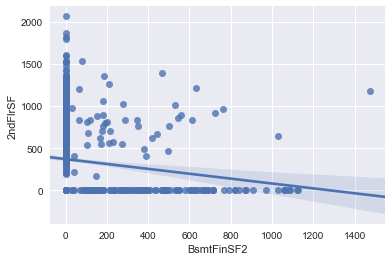

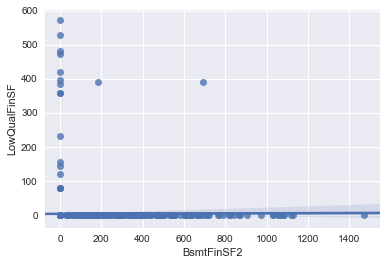

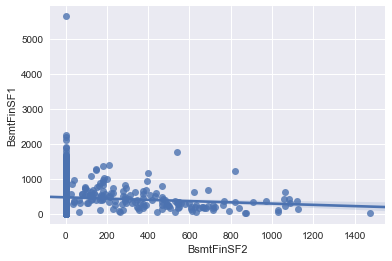

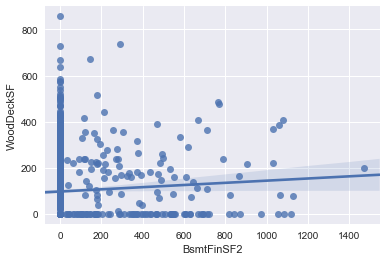

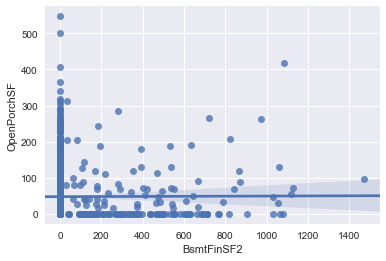

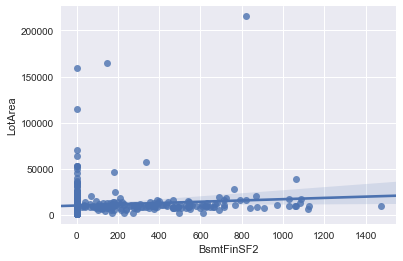

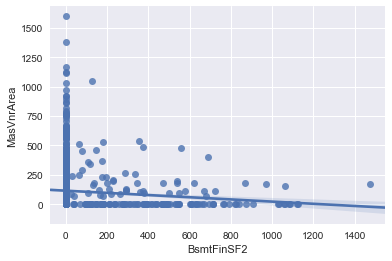

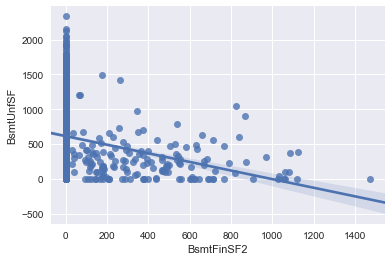

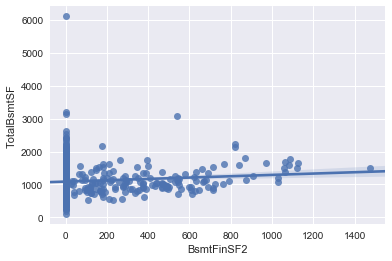

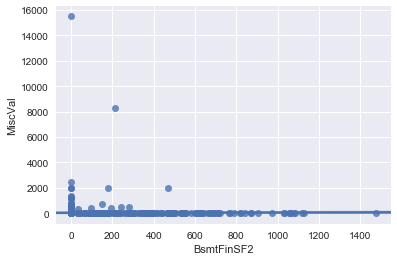

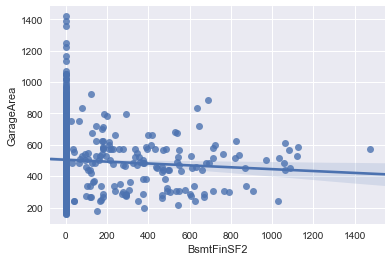

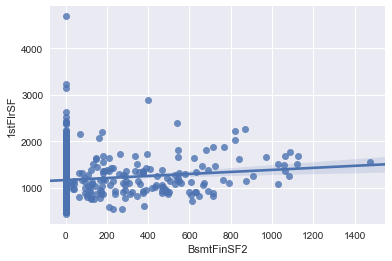

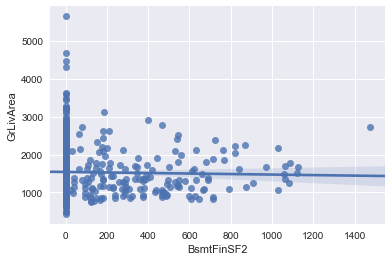

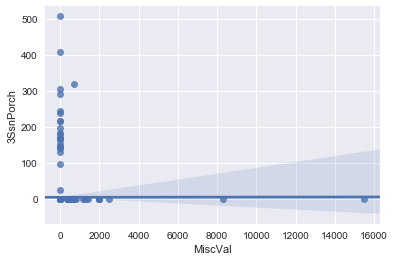

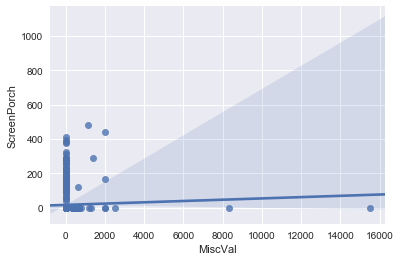

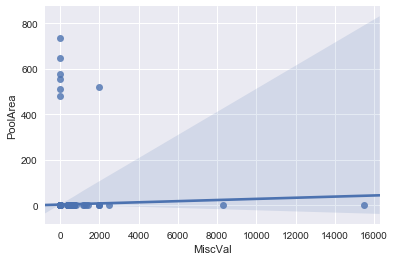

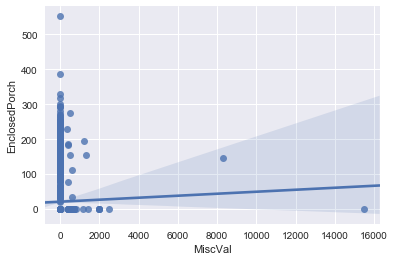

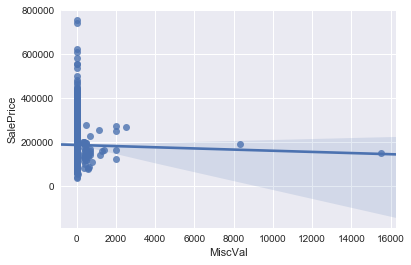

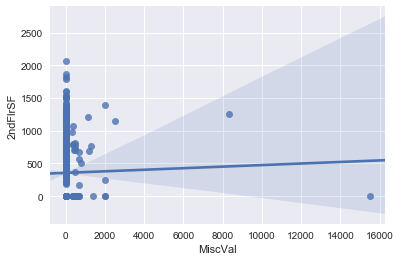

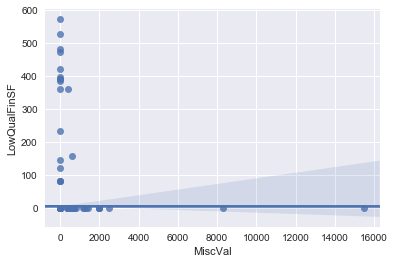

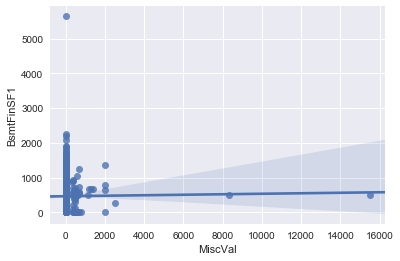

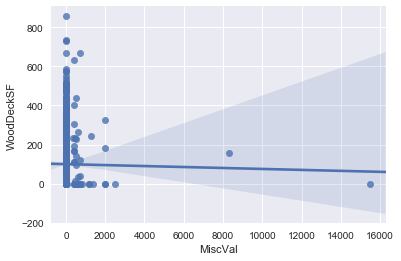

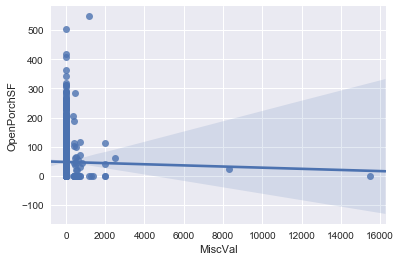

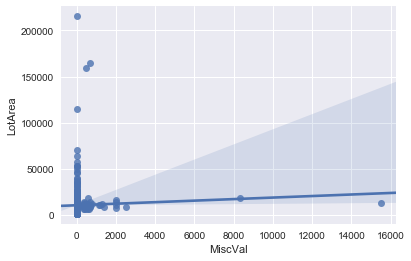

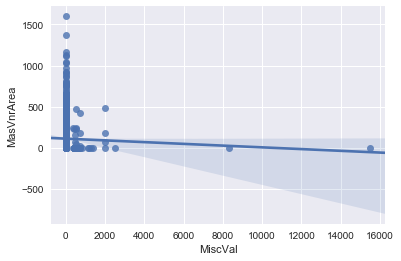

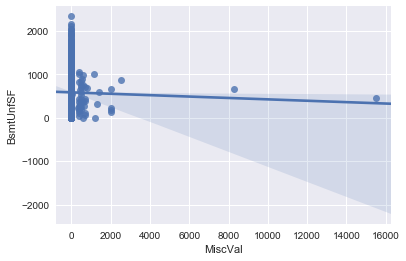

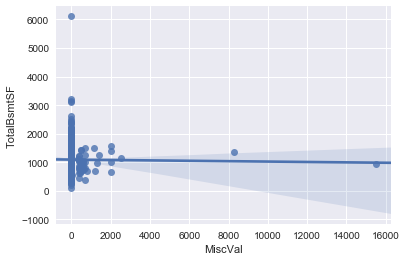

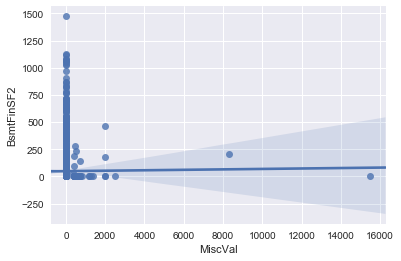

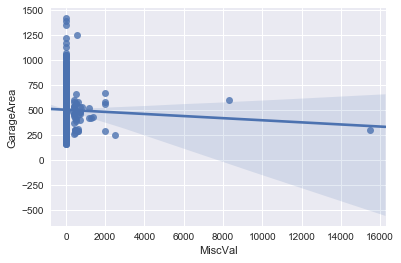

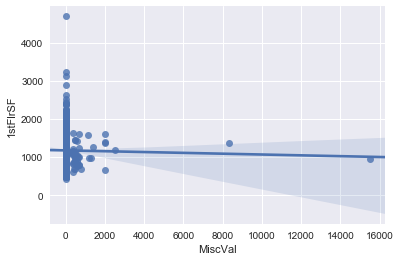

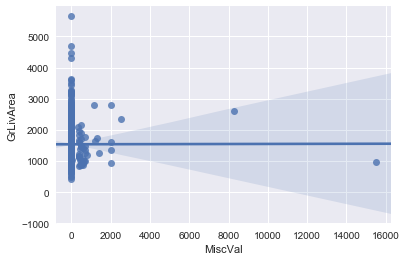

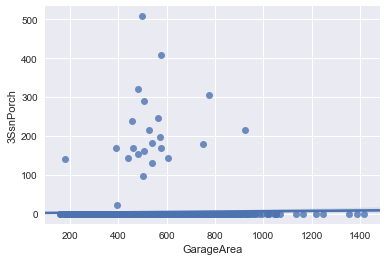

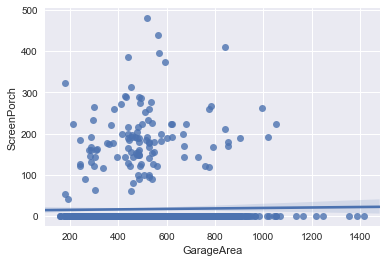

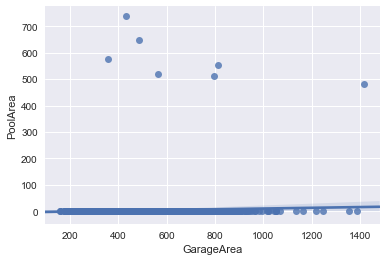

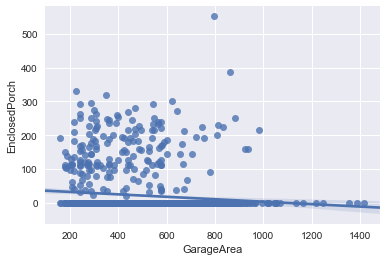

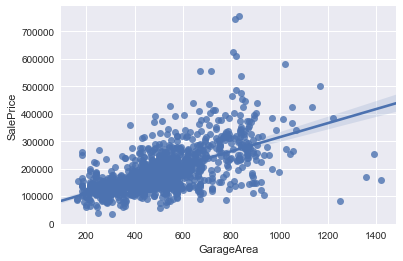

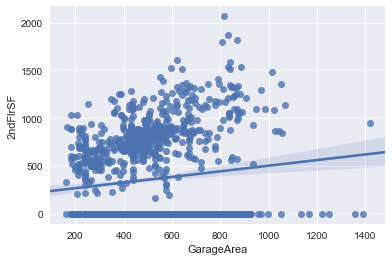

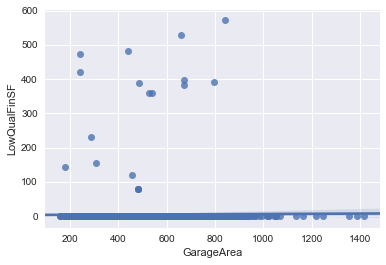

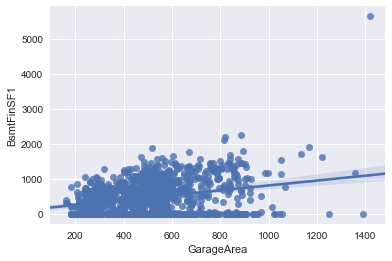

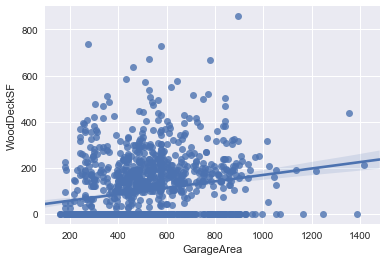

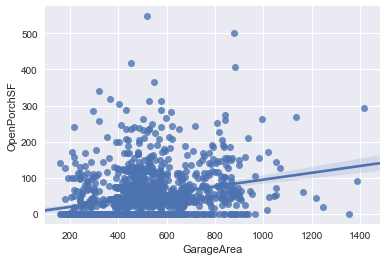

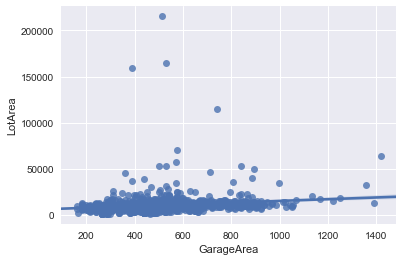

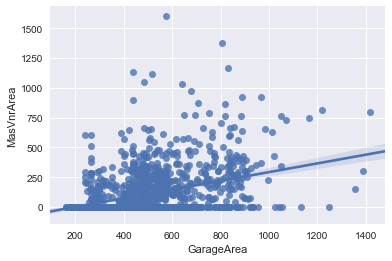

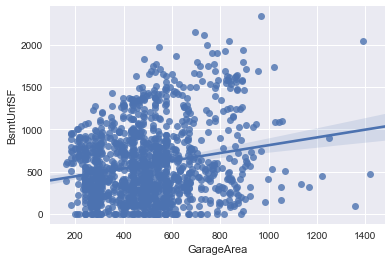

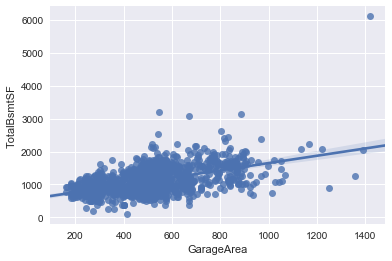

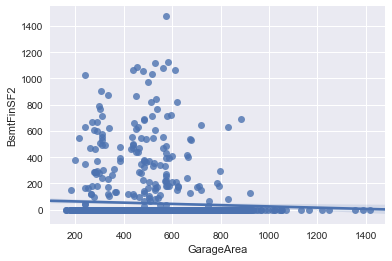

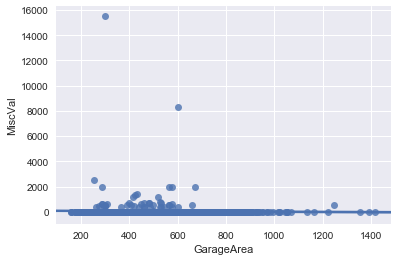

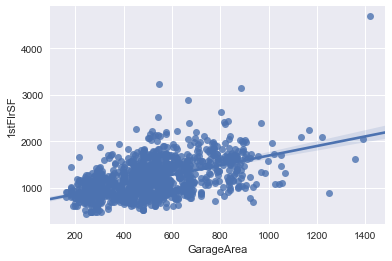

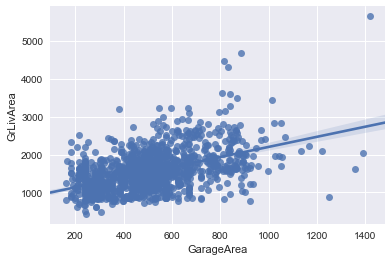

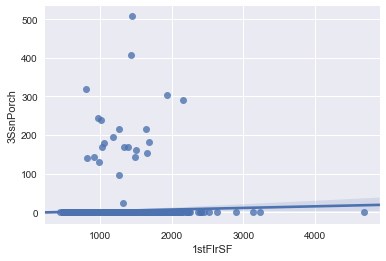

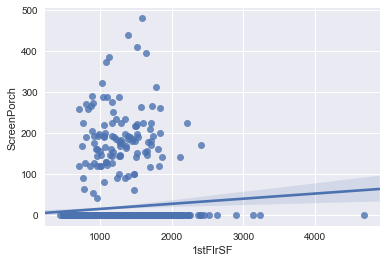

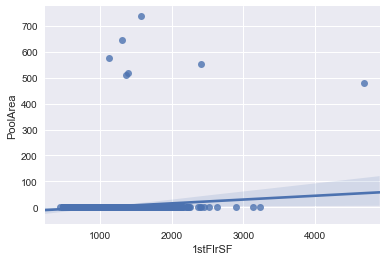

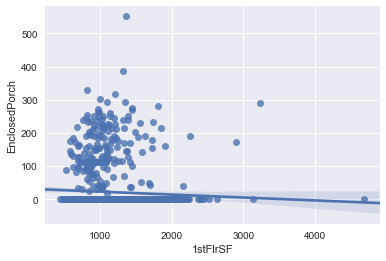

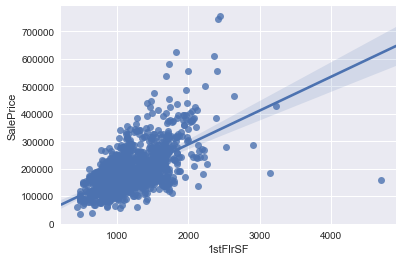

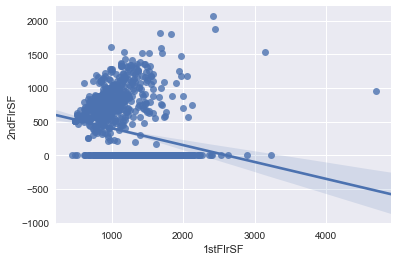

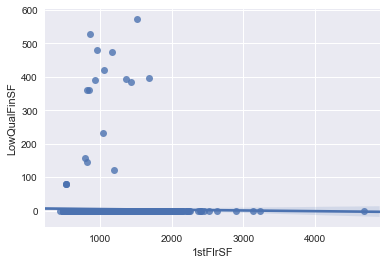

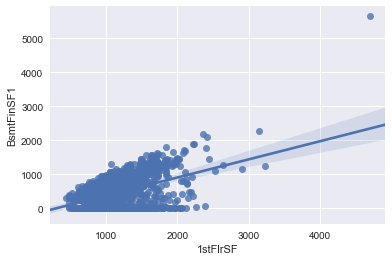

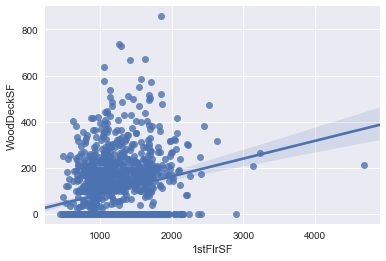

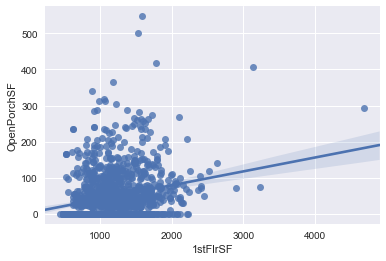

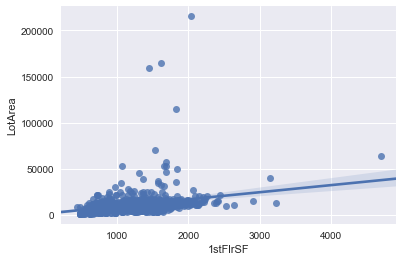

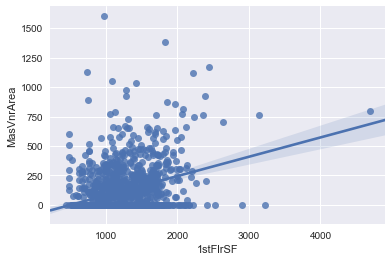

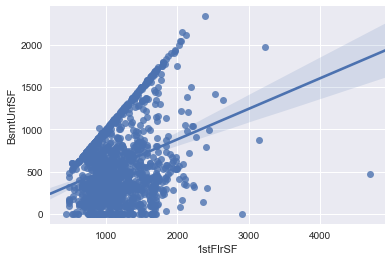

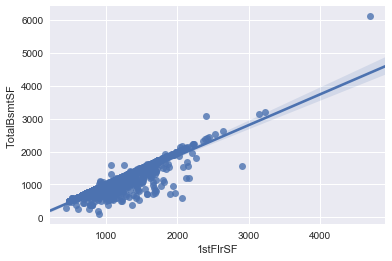

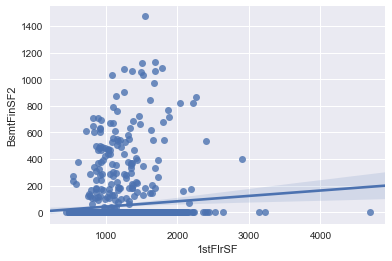

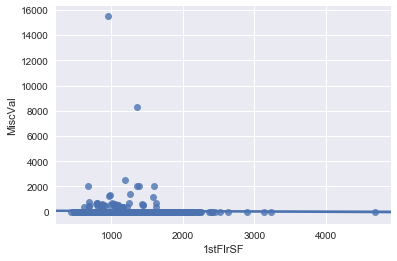

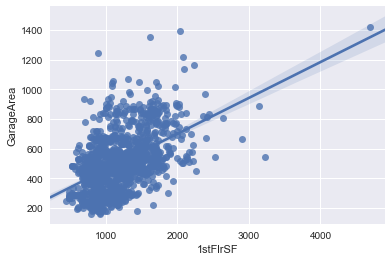

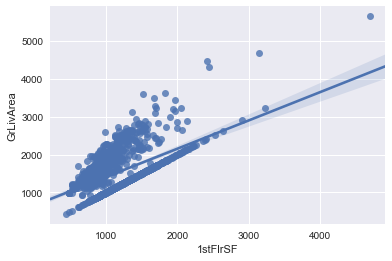

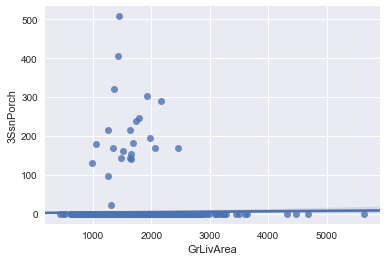

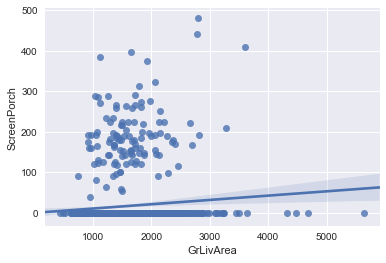

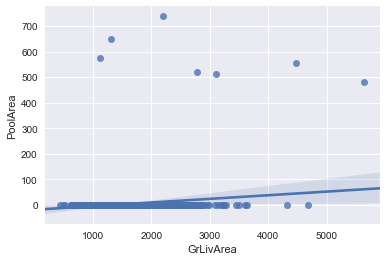

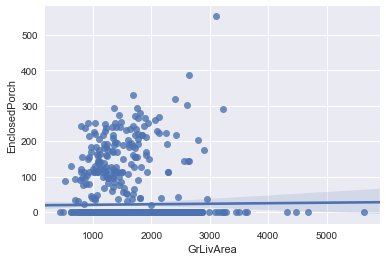

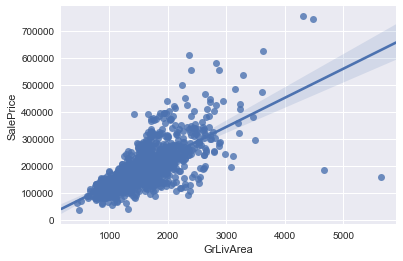

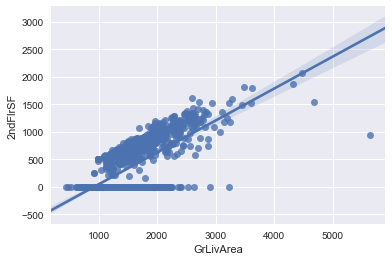

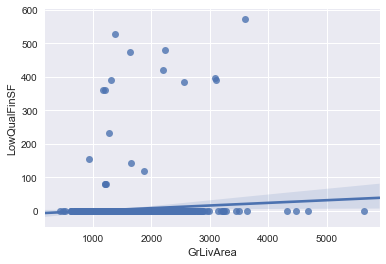

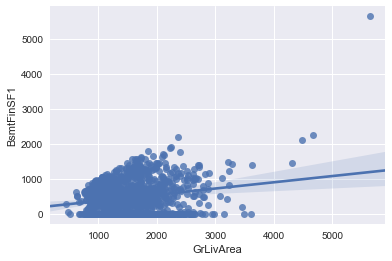

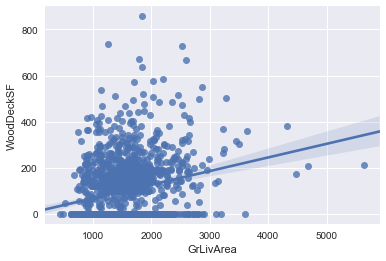

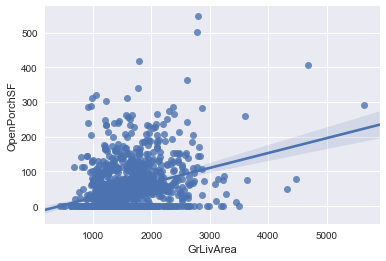

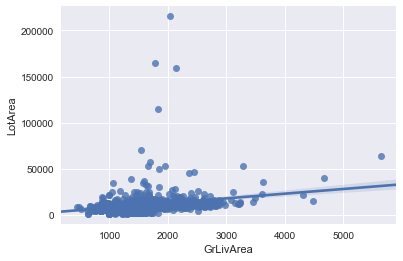

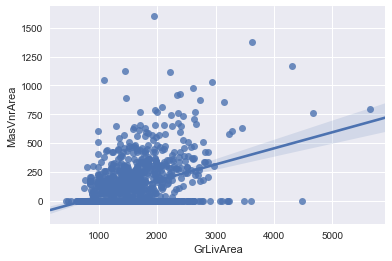

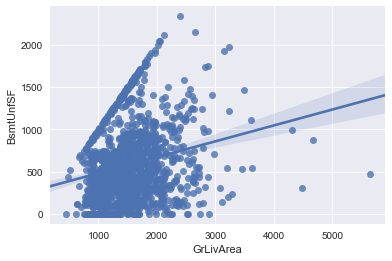

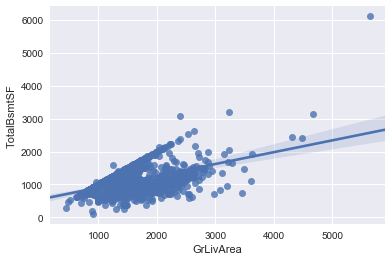

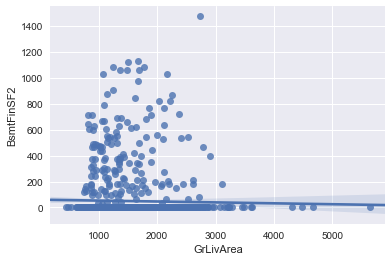

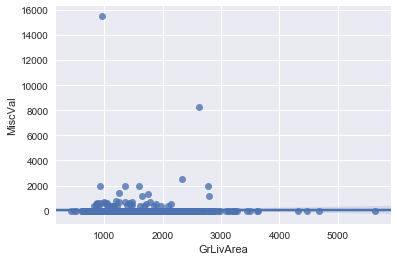

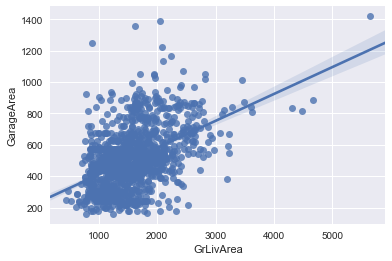

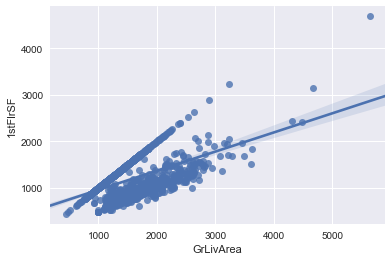

In [24]:
for colx in contCols:
    for coly in contCols:
        if colx != coly:
            ax = sns.regplot(x=colx,y=coly, data=df_dropped)
            plt.show()

In [114]:
# trimp outliers
#df_trim = pd.DataFrame()
#df_trim = df_dropped.copy(deep=True)
#for col in contCols:
#    df_trim = df_trim[df_trim[col] < df_trim[col].quantile(.99)] 

In [25]:
df_allDumm = pd.DataFrame()
df_allNoTxt = pd.DataFrame()

noTxtCols = list(set(df_dropped.columns) - set(catTxtCols))

df_allDumm = pd.get_dummies(df_dropped[catTxtCols])

df_allNoTxt = pd.concat([df_dropped[noTxtCols], df_allDumm], axis=1)

In [26]:
df_allNoTxt.head()

BedroomAbvGr  3SsnPorch  ScreenPorch  MSSubClass  FullBath  SalePrice  \
0             3          0            0          60         2     208500   
1             3          0            0          20         2     181500   
2             3          0            0          60         2     223500   
3             3          0            0          70         1     140000   
4             4          0            0          60         2     250000   

   BsmtFinSF1  WoodDeckSF  OpenPorchSF  LotArea      ...        GarageCond_Gd  \
0         706           0           61     8450      ...                    0   
1         978         298            0     9600      ...                    0   
2         486           0           42    11250      ...                    0   
3         216           0           35     9550      ...                    0   
4         655         192           84    14260      ...                    0   

   GarageCond_Po  GarageCond_TA  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  \
0              0              1            0            0            0   
1              0              1            0            0            0   
2              0              1            0            0            0   
3              0              1            0            1            0   
4              0              1            0            0            0   

   BsmtCond_TA  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  
0            1              1              0              0  
1            1              1              0              0  
2            1              1              0              0  
3            0              1              0              0  
4            1              1              0              0  

[5 rows x 265 columns]

In [102]:
allFeats = [a for a in df_allNoTxt.columns if a not in ['SalePrice']]
contFeats = [a for a in df_allNoTxt[contCols].columns if a not in ['SalePrice']]

X=df_allNoTxt[contFeats]
Y=df_allNoTxt['SalePrice']
X.head()

3SsnPorch  ScreenPorch  PoolArea  EnclosedPorch  2ndFlrSF  LowQualFinSF  \
0          0            0         0              0       854             0   
1          0            0         0              0         0             0   
2          0            0         0              0       866             0   
3          0            0         0            272       756             0   
4          0            0         0              0      1053             0   

   BsmtFinSF1  WoodDeckSF  OpenPorchSF  LotArea  MasVnrArea  BsmtUnfSF  \
0         706           0           61     8450       196.0        150   
1         978         298            0     9600         0.0        284   
2         486           0           42    11250       162.0        434   
3         216           0           35     9550         0.0        540   
4         655         192           84    14260       350.0        490   

   TotalBsmtSF  BsmtFinSF2  MiscVal  GarageArea  1stFlrSF  GrLivArea  
0          856           0        0         548       856       1710  
1         1262           0        0         460      1262       1262  
2          920           0        0         608       920       1786  
3          756           0        0         642       961       1717  
4         1145           0        0         836      1145       2198

In [121]:
maxFeatRange = range(2,10)
maxDepthRange = range(2,10)
df_Results = pd.DataFrame()

for maxFeat in maxFeatRange:
    for maxDepth in maxDepthRange:
        
        rfc=ensemble.RandomForestClassifier()
        
        decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=maxFeat,
        max_depth=maxDepth
        )
        start_time = time.time()
        dt = decision_tree.fit(X, Y)
        timeVal = time.time() - start_time
        
        crossVal = cross_val_score(dt, X, Y, cv=10)
        r = np.mean(crossVal)
        ovrFit = np.var(crossVal)
        Name = "F"+str(maxFeat)+" D"+str(maxDepth)
        df_Results = df_Results.append({'Name': Name, 
                                        'Accuracy': r,
                                        'OverFit': ovrFit,
                                        'Time' : timeVal
                                       }, ignore_index=True)

df_sorted = df_Results.sort_values('OverFit', ascending=False)


In [122]:
df_sorted.head()

Accuracy   Name   OverFit      Time
33  0.038938  F6 D3  0.003747  0.055378
42  0.036428  F7 D4  0.002577  0.081773
56  0.042458  F9 D2  0.002258  0.075306
32  0.041749  F6 D2  0.002163  0.046884
41  0.040722  F7 D3  0.002118  0.066428

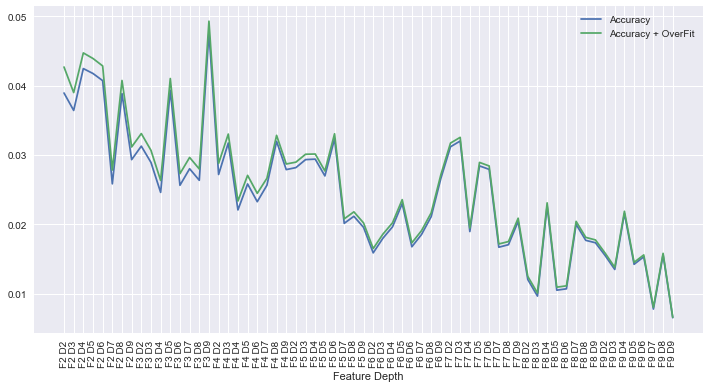

In [145]:
labels = []
plt.figure(figsize=(12,6))
plt.plot(df_Results['Name'], df_sorted['Accuracy'])
labels.append('Accuracy')
plt.plot(df_Results['Name'], df_sorted['Accuracy'] + df_sorted['OverFit'])
labels.append('Accuracy + OverFit')
plt.xlabel('Feature Depth')
plt.legend(labels)
plt.xticks(rotation=90)
plt.show()

In [118]:


rfc = ensemble.RandomForestClassifier()

start_time = time.time()
rfc = rfc.fit(X, Y)
timeVal = time.time() - start_time

results = cross_val_score(rfc, X, Y, cv=10)
display(results)

print ("Random Forest")
print ("Accuracy: " + str(np.mean(results)))
print ("Overfitting: " + str(np.var(results)))
print ("Time: %s secs" % timeVal)


array([ 0.00956938,  0.00833333,  0.01973684,  0.00970874,  0.        ,
        0.03773585,  0.02857143,  0.03846154,  0.        ,  0.07142857])

Random Forest
Accuracy: 0.0223545678811
Overfitting: 0.000446920450704
Time: 0.42653989791870117 secs
